In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


In [ ]:
a=5
print(id(a))
a=a+4
print(id(a))

94548886223488
94548886223616


#TABULATION


In [ ]:
url='https://api.covid19india.org/states_daily.json'

In [ ]:
import urllib.request

In [ ]:
urllib.request.urlretrieve(url,"data.json")

('data.json', <http.client.HTTPMessage at 0x7f64057255f8>)

In [ ]:
covid_data=pd.read_json("data.json")

In [ ]:
covid_data

states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
658  {'an': '24', 'ap': '4303', 'ar': '228', 'as': ...
659  {'an': '0', 'ap': '24', 'ar': '0', 'as': '7', ...
660  {'an': '15', 'ap': '3503', 'ar': '135', 'as': ...
661  {'an': '10', 'ap': '5144', 'ar': '255', 'as': ...
662  {'an': '0', 'ap': '28', 'ar': '1', 'as': '9', ...

[663 rows x 1 columns]

In [ ]:
import json
with open("data.json") as f:
  data = json.load(f)

In [ ]:
data = data['states_daily']
covid_data=pd.json_normalize(data)

In [ ]:
covid_data

an    ap   ar    as    br   ch    ct  ...    tn   tr     tt un    up   ut    wb
0     0     1    0     0     0    0     0  ...     1    0     81  0    12    0     0
1     0     0    0     0     0    0     0  ...     0    0      9  0     4    0     0
2     0     0    0     0     0    0     0  ...     0    0      2  0     0    0     0
3     0     0    0     0     0    0     0  ...     0    0     27  0     1    0     0
4     0     0    0     0     0    0     0  ...     0    0      4  0     0    0     0
..   ..   ...  ...   ...   ...  ...   ...  ...   ...  ...    ... ..   ...  ...   ...
658  24  4303  228  1530  1195   63  3091  ...  4515  328  69800  0  3093  504  3272
659   0    24    0     7     7    0    56  ...    52    2    589  0    27    6    63
660  15  3503  135   666  1837   57  2507  ...  3094  135  54404  0  2289  241  4029
661  10  5144  255  1201  1100  107  2727  ...  4403  198  61933  0  3339  376  3382
662   0    28    1     9     8    1    50  ...    47    0    714  0    29   13    61

[663 rows x 42 columns]

In [ ]:
df=covid_data


In [ ]:
df.loc[:,"date"]=pd.to_datetime(df.loc[:,"date"])

KeyError: ignored

In [ ]:
df=df.loc[df["status"]=="Confirmed"]

In [ ]:
df.drop("status",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.set_index("date",inplace=True)

In [ ]:
df

an    ap   ar   as    br  ch  ...   tr     tt un    up   ut    wb
date                                      ...                                
2020-03-14   0     1    0    0     0   0  ...    0     81  0    12    0     0
2020-03-15   0     0    0    0     0   0  ...    0     27  0     1    0     0
2020-03-16   0     0    0    0     0   0  ...    0     15  0     0    1     0
2020-03-17   0     0    0    0     0   0  ...    0     11  0     2    0     1
2020-03-18   0     0    0    0     0   0  ...    0     37  0     2    1     0
...         ..   ...  ...  ...   ...  ..  ...  ...    ... ..   ...  ...   ...
2020-10-16  10  3967  198  767  1062  55  ...  162  62304  0  2552  549  3771
2020-10-17  11  3676  179  642  1173  50  ...  134  61893  0  2725  606  3865
2020-10-18  25  3986   57  318  1152  64  ...  141  56519  0  2486  376  3983
2020-10-19  18  2918  238  698   912  40  ...   85  45506  0  1719  336  3992
2020-10-20  15  3503  135  666  1837  57  ...  135  54404  0  2289  241  4029

[221 rows x 40 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 221 entries, 2020-03-14 to 2020-10-20
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       221 non-null    object
 1   ap       221 non-null    object
 2   ar       221 non-null    object
 3   as       221 non-null    object
 4   br       221 non-null    object
 5   ch       221 non-null    object
 6   ct       221 non-null    object
 7   dateymd  221 non-null    object
 8   dd       221 non-null    object
 9   dl       221 non-null    object
 10  dn       221 non-null    object
 11  ga       221 non-null    object
 12  gj       221 non-null    object
 13  hp       221 non-null    object
 14  hr       221 non-null    object
 15  jh       221 non-null    object
 16  jk       221 non-null    object
 17  ka       221 non-null    object
 18  kl       221 non-null    object
 19  la       221 non-null    object
 20  ld       221 non-null    object
 21  mh       221 non-nul

In [ ]:
df.loc[:,"tn"]#dtype is object

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2020-10-16    4389
2020-10-17    4295
2020-10-18    3914
2020-10-19    3536
2020-10-20    3094
Name: tn, Length: 221, dtype: object

In [ ]:
pd.to_numeric(df.loc[:,"tn"])

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2020-10-16    4389
2020-10-17    4295
2020-10-18    3914
2020-10-19    3536
2020-10-20    3094
Name: tn, Length: 221, dtype: int64

In [ ]:
df=df.apply(pd.to_numeric)

ValueError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2020-03-14 to 2020-10-10
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      211 non-null    int64
 1   ap      211 non-null    int64
 2   ar      211 non-null    int64
 3   as      211 non-null    int64
 4   br      211 non-null    int64
 5   ch      211 non-null    int64
 6   ct      211 non-null    int64
 7   dd      211 non-null    int64
 8   dl      211 non-null    int64
 9   dn      211 non-null    int64
 10  ga      211 non-null    int64
 11  gj      211 non-null    int64
 12  hp      211 non-null    int64
 13  hr      211 non-null    int64
 14  jh      211 non-null    int64
 15  jk      211 non-null    int64
 16  ka      211 non-null    int64
 17  kl      211 non-null    int64
 18  la      211 non-null    int64
 19  ld      211 non-null    int64
 20  mh      211 non-null    int64
 21  ml      211 non-null    int64
 22  mn      211 non-null    int64
 

In [ ]:
df.tail(7)

an    ap   ar    as    br   ch  ...   tr     tt  un    up    ut    wb
date                                        ...                                  
2020-10-04  16  6242  127   756  1261   85  ...  322  74770   0  3840  1419  3357
2020-10-05  15  4256  235  1518   907  133  ...  159  60130   0  2971   510  3348
2020-10-06  13  5795  224  1184  1265  129  ...  275  71869   0  3500   338  3370
2020-10-07  23  5120  260  1307  1304  113  ...  237  78809   0  3389   630  3455
2020-10-08  17  5292  212  1188  1244  102  ...  214  70797   0  3133   400  3526
2020-10-09  24  5145  281  1019  1155   63  ...  223  73305   0  3207   704  3573
2020-10-10  16  5653  238   971  1140   96  ...  171  74418   0  3046   462  3591

[7 rows x 39 columns]

##STYLING TABULATION

In [ ]:
df=df.tail()

In [ ]:
df.style

In [ ]:
def colour_red_negative(x):
  color="red" if x<0 else "green"
  return "color:"+color

In [ ]:
df.style.applymap(colour_red_negative)

In [ ]:
df.drop('un',axis=1,inplace=True)

In [ ]:
df

an    ap   ar    as    br   ch  ...    tn   tr     tt    up   ut    wb
date                                        ...                                   
2020-10-06  13  5795  224  1184  1265  129  ...  5017  275  71869  3500  338  3370
2020-10-07  23  5120  260  1307  1304  113  ...  5447  237  78809  3389  630  3455
2020-10-08  17  5292  212  1188  1244  102  ...  5088  214  70797  3133  400  3526
2020-10-09  24  5145  281  1019  1155   63  ...  5185  223  73305  3207  704  3573
2020-10-10  16  5653  238   971  1140   96  ...  5242  171  74418  3046  462  3591

[5 rows x 38 columns]

In [ ]:
df.style.highlight_max(color="red")#largest in eacj column

In [ ]:
df.drop(["dd","ld"],axis=1,inplace=True)

In [ ]:
df.style.highlight_max(color="red").highlight_min(color="green")

In [ ]:
#since tt show total we dont need it
#so drop it
df.drop("tt",axis=1,inplace=True)

In [ ]:
df

an    ap   ar    as    br   ch  ...    tg    tn   tr    up   ut    wb
date                                        ...                                  
2020-10-06  13  5795  224  1184  1265  129  ...  1983  5017  275  3500  338  3370
2020-10-07  23  5120  260  1307  1304  113  ...  2154  5447  237  3389  630  3455
2020-10-08  17  5292  212  1188  1244  102  ...  1896  5088  214  3133  400  3526
2020-10-09  24  5145  281  1019  1155   63  ...  1891  5185  223  3207  704  3573
2020-10-10  16  5653  238   971  1140   96  ...  1811  5242  171  3046  462  3591

[5 rows x 35 columns]

In [ ]:
def bold_max_value(x):
  is_max=(x==x.max())
  return ["font-weight : bold" if y else " "for y in is_max]

In [ ]:
df.style.apply(bold_max_value).highlight_min(color="blue")

In [ ]:
df.style.apply(bold_max_value).highlight_min(color="blue",axis=1)#along rows

In [ ]:
df.style.background_gradient(cmap="Reds")

In [ ]:
df.style.background_gradient(cmap="Reds",axis=1)

In [ ]:
df.style.background_gradient(cmap="Reds",subset=["mh","tn","dl"])

In [ ]:
df.style.bar()

In [ ]:
df.style.bar(subset=["mh","tn"])

In [ ]:
df[["ml","tn","dl"]].style.bar()

In [ ]:
df[["ml","tn","dl"]].style.bar(subset=["ml"],color="red").bar(subset=["tn"],color="blue").bar(subset=["dl"],color="green")

#DISTRIBUTION OF DATA


##DISTRIBUTION OF SINGLE CONTINUOUS VARIABLE


###HISTOGRAM



In [ ]:
x=np.random.normal(size=1000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


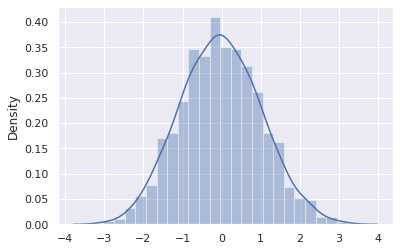

In [ ]:
#distribution plot-distplot
sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


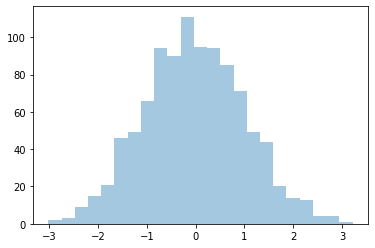

In [ ]:
sns.distplot(x,kde=False)

In [ ]:
sns.set(color_codes=True)

In [ ]:
sns.distplot(x,kde=False,rug=True)
#rug-->shows the actual value
#useful to know outliers


In [ ]:
sns.distplot(x,kde=False,rug=True,bins=50)

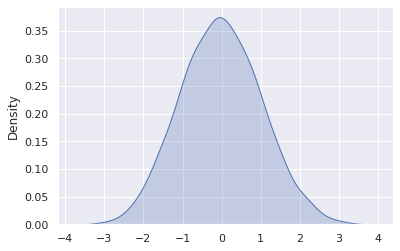

In [ ]:
sns.kdeplot(x,shade=True)#shaded area=1

In [ ]:
y=np.random.uniform(size=1000)

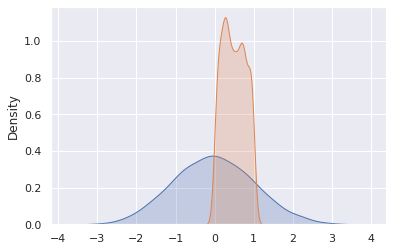

In [ ]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True)

In [ ]:
d=sns.load_dataset('diamonds')

In [ ]:
print(type(d))
d

<class 'pandas.core.frame.DataFrame'>


carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


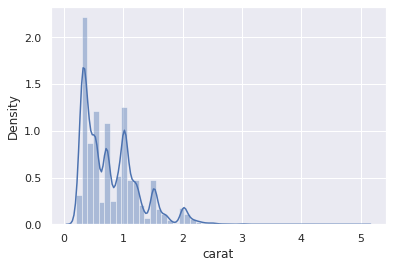

In [ ]:
sns.distplot(d.loc[:,"carat"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


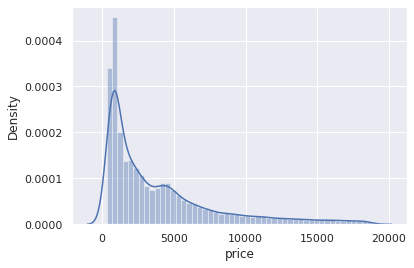

In [ ]:
sns.distplot(d.loc[:,"price"])#unimodal

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


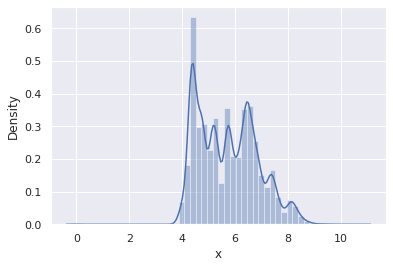

In [ ]:
sns.distplot(d.loc[:,"x"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


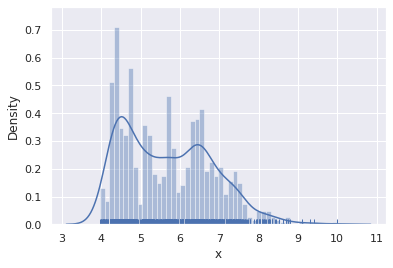

In [ ]:
sns.distplot(d.sample(1000).loc[:,"x"],rug=True,bins=50)

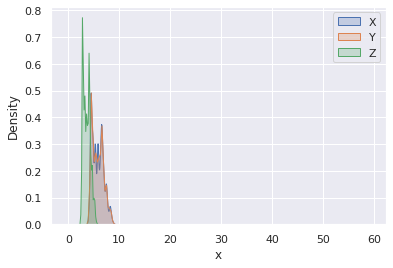

In [ ]:
sns.kdeplot(d.loc[:,"x"],label="X",shade=True)
sns.kdeplot(d.loc[:,"y"],label="Y",shade=True)
sns.kdeplot(d.loc[:,"z"],label="Z",shade=True)
plt.legend()


###BOX PLOT


In [ ]:
x=np.random.normal(size=1000)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


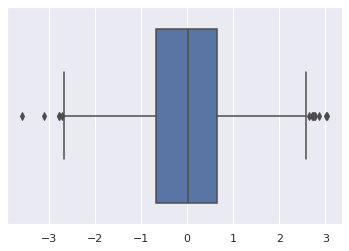

In [ ]:
sns.boxplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


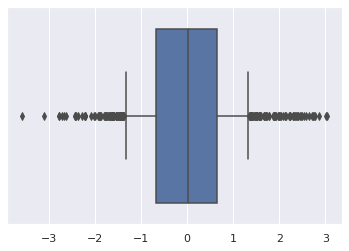

In [ ]:
sns.boxplot(x,whis=0.5)#whis -distance between whisker and box"

In [ ]:
y=np.random.uniform(size=1000)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


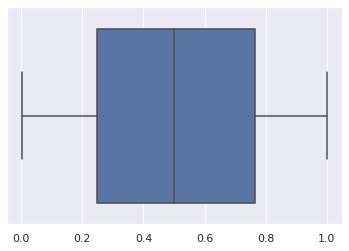

In [ ]:
sns.boxplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


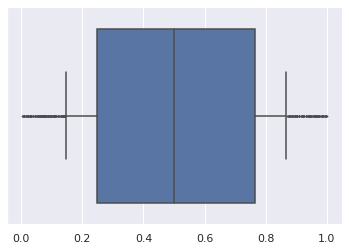

In [ ]:
sns.boxplot(x,whis=0.2,fliersize=1)

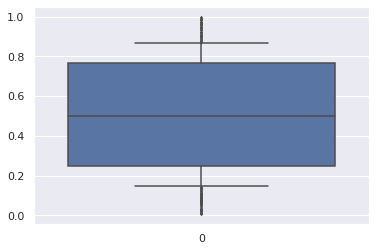

In [ ]:
sns.boxplot(data=x,whis=0.2,fliersize=1,orient="v");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


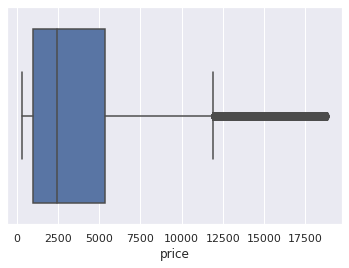

In [ ]:
sns.boxplot(d.loc[:,"price"])

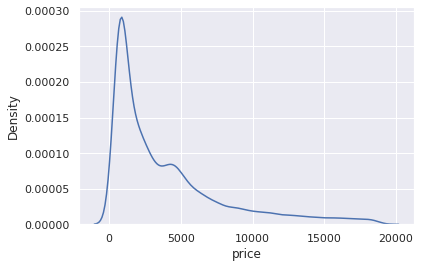

In [ ]:
sns.kdeplot(d.loc[:,"price"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


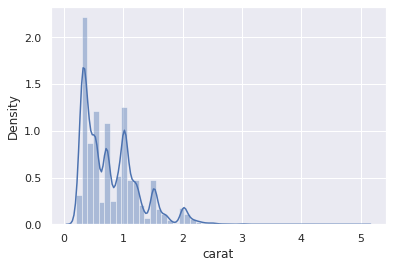

In [ ]:
sns.distplot(d.loc[:,"carat"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


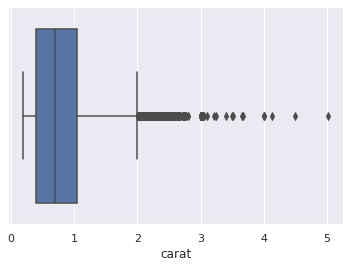

In [ ]:
sns.boxplot(d.loc[:,"carat"])

###BOXEN PLOT




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


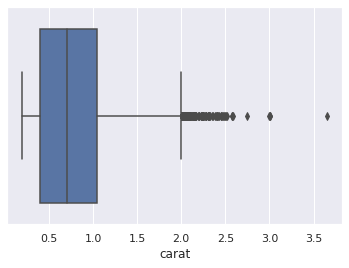

In [ ]:
sns.boxplot(d.sample(5000).loc[:,"carat"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


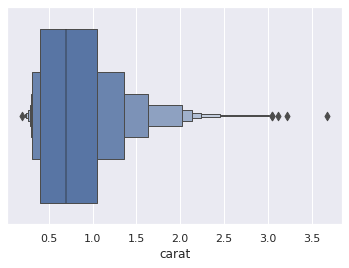

In [ ]:
sns.boxenplot(d.sample(5000).loc[:,"carat"])#gives better sense of distribution of data than box plot

In [ ]:
p=sns.load_dataset('penguins')

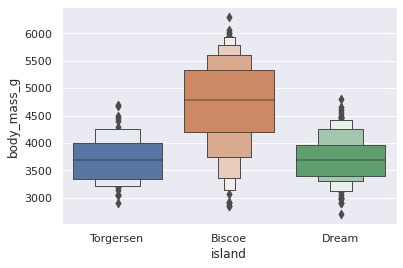

In [ ]:
sns.boxenplot(x="island",y="body_mass_g",data=p)

##DISTRIBUTION OF CATEGORICAL VARIABLES
  

###BAR PLOTS


In [ ]:
#split,apply,aggregate
c=d.groupby("cut").count().loc[:,"carat"]#can be anything other than carat (just to know count!!!)


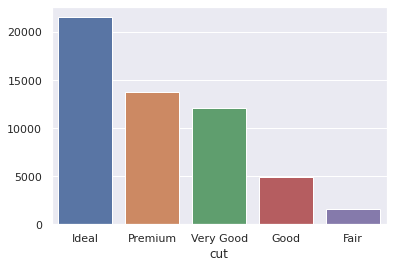

In [ ]:
sns.barplot(x=c.index,y=c.values)

In [ ]:
c=d.groupby("clarity").count().loc[:,"carat"]
sns.barplot(x=c.index,y=c.values)

In [ ]:
c=d.groupby("color").count().iloc[:,1]#iloc can also be used
sns.barplot(x=c.index,y=c.values)

##JOINT DISTRIBUTION OF TWO VARIABLES


In [ ]:
x=np.random.normal(size=1000)
y=np.random.normal(size=1000)

In [ ]:
df=pd.DataFrame({'x':x,'y':y})

In [ ]:
sns.jointplot('x','y',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


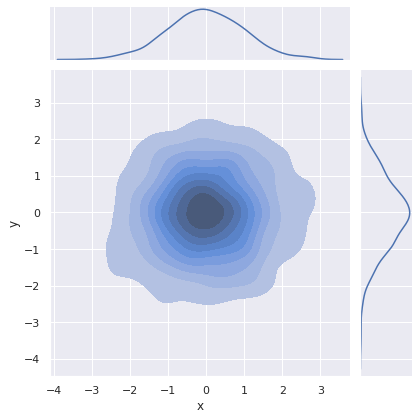

In [ ]:
sns.jointplot('x','y',data=df,kind='kde',shade=True)

In [ ]:
x=np.random.normal(size=1000)
y= 3 *x + np.random.normal(size=1000)/5

In [ ]:
df=pd.DataFrame({'x':x,'y':y})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


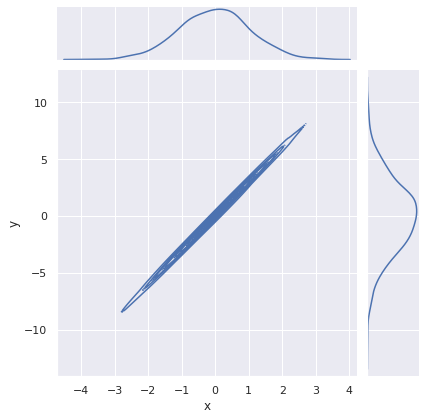

In [ ]:
sns.jointplot('x','y',data=df,kind='kde')

In [ ]:
d=sns.load_dataset('diamonds')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


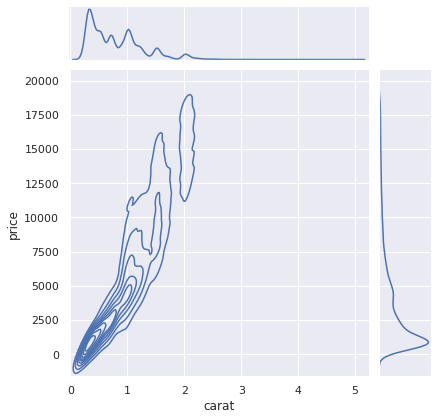

In [ ]:
sns.jointplot('carat','price',data=d,kind="kde")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


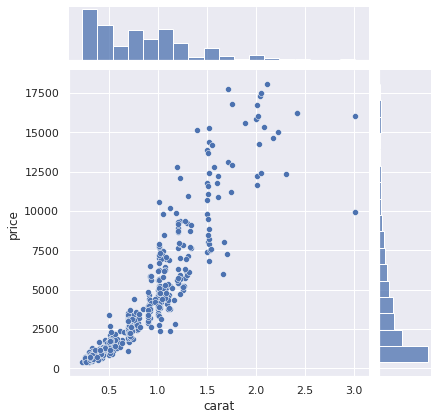

In [ ]:
sns.jointplot('carat','price',data=d.sample(500))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


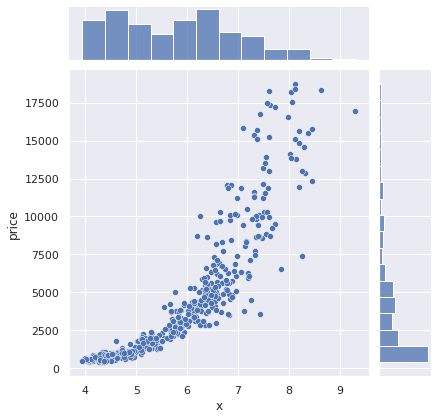

In [ ]:
sns.jointplot('x','price',data=d.sample(500))#x-length of diamond

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


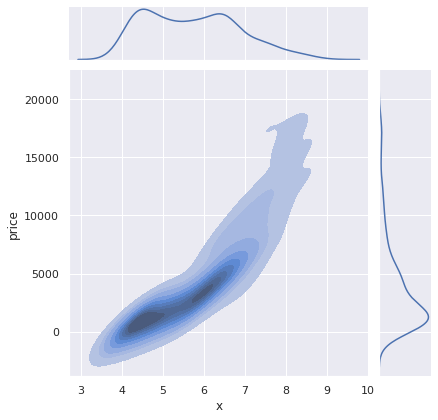

In [ ]:
sns.jointplot('x','price',data=d.sample(500),kind="kde",shade=True)


###SWARM PLOT

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


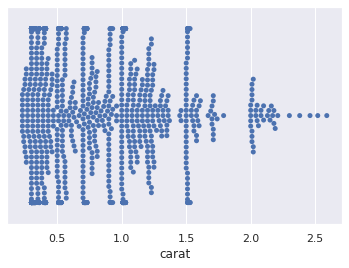

In [ ]:
sns.swarmplot(d.sample(1000).loc[:,"carat"])#head can also be used

In [ ]:
sns.swarmplot(d.sample(1000).loc[:,"price"])

In [ ]:
sns.swarmplot(x="cut",y="price",data=d.sample(1000))

In [ ]:
sns.swarmplot(x="color",y="price",data=d.sample(1000))

In [ ]:
sns.swarmplot(x="clarity",y="price",data=d.sample(1000))

In [ ]:
p=sns.load_dataset('penguins')

In [ ]:
p

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1    Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2    Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3    Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4    Adelie  Torgersen            36.7  ...              193.0       3450.0  Female
..      ...        ...             ...  ...                ...          ...     ...
339  Gentoo     Biscoe             NaN  ...                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8  ...              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4  ...              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2  ...              212.0       5200.0  Female
343  Gentoo     Biscoe            49.9  ...              213.0       5400.0    Male

[344 rows x 7 columns]

In [ ]:
sns.swarmplot(x="species",y="body_mass_g",data=p)

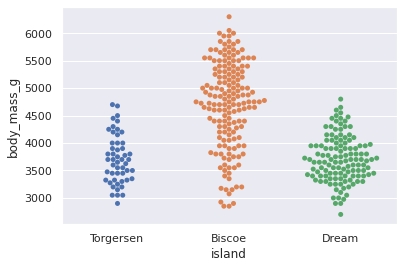

In [ ]:
sns.swarmplot(x="island",y="body_mass_g",data=p)

###VIOLIN PLOT

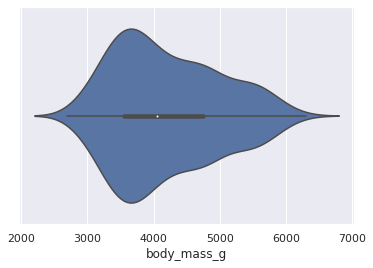

In [ ]:
sns.violinplot(x="body_mass_g",data=p)

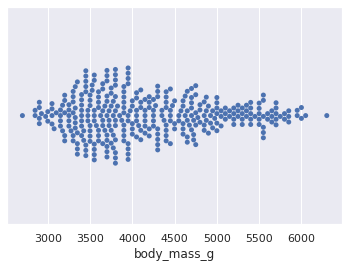

In [ ]:
#violin=box+kde...outliers cannot be seen in violinplot like box 
sns.swarmplot(x="body_mass_g",data=p)

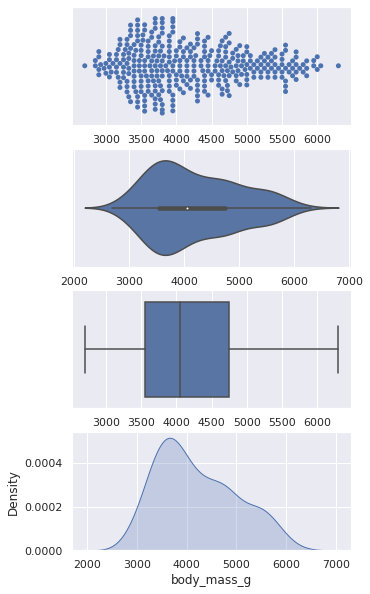

In [ ]:
fig,axs=plt.subplots(nrows=4)
fig.set_size_inches(5,10)
sns.swarmplot(x="body_mass_g",data=p,ax=axs[0])
sns.violinplot(x="body_mass_g",data=p,ax=axs[1])
sns.boxplot(x="body_mass_g",data=p,ax=axs[2])
sns.kdeplot(p.loc[:,"body_mass_g"],shade=True,ax=axs[3])



[(2000.0, 7500.0)]

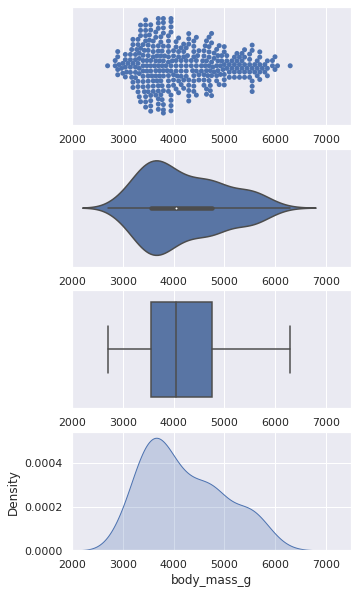

In [ ]:
fig,axs=plt.subplots(nrows=4)
fig.set_size_inches(5,10)
p1=sns.swarmplot(x="body_mass_g",data=p,ax=axs[0])
p1.set(xlim=(2000,7500))
p2=sns.violinplot(x="body_mass_g",data=p,ax=axs[1])
p2.set(xlim=(2000,7500))
p3=sns.boxplot(x="body_mass_g",data=p,ax=axs[2])
p3.set(xlim=(2000,7500))
p4=sns.kdeplot(p.loc[:,"body_mass_g"],shade=True,ax=axs[3])
p4.set(xlim=(2000,7500))


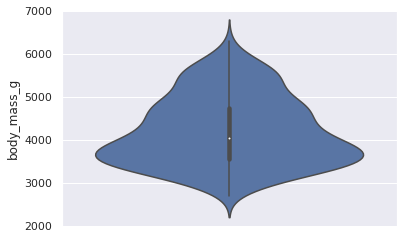

In [ ]:
sns.violinplot(y="body_mass_g",data=p)#vertical

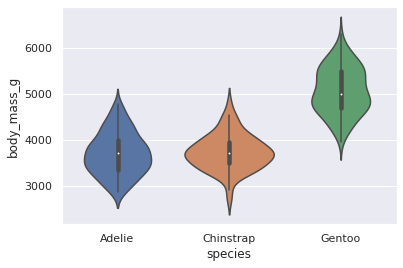

In [ ]:
sns.violinplot(x="species",y="body_mass_g",data=p)

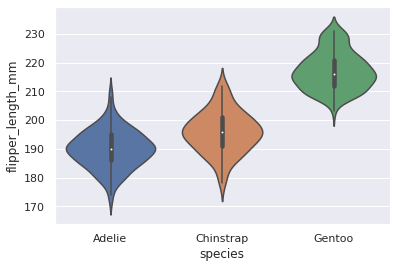

In [ ]:
sns.violinplot(x="species",y="flipper_length_mm",data=p)

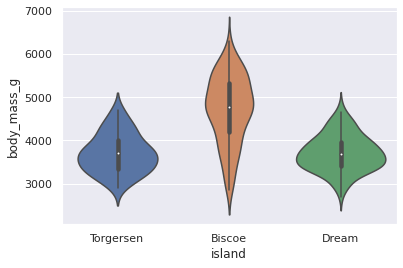

In [ ]:
sns.violinplot(x="island",y="body_mass_g",data=p)

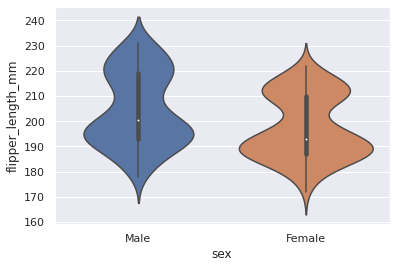

In [ ]:
sns.violinplot(x="sex",y="flipper_length_mm",data=p) 

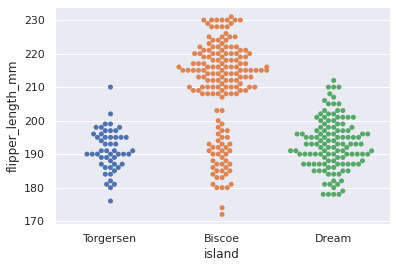

In [ ]:
sns.swarmplot(x="island",y="flipper_length_mm",data=p)

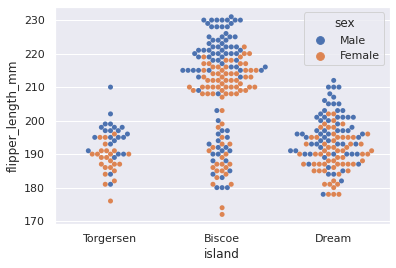

In [ ]:
sns.swarmplot(x="island",y="flipper_length_mm",hue="sex",data=p)

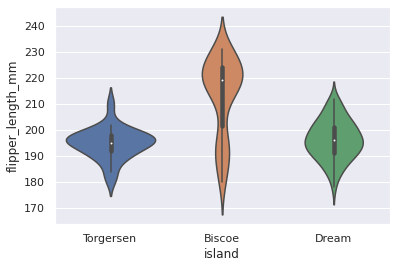

In [ ]:
sns.violinplot(x="island",y="flipper_length_mm", data=p.loc[p.loc[:,"sex"]=='Male'])

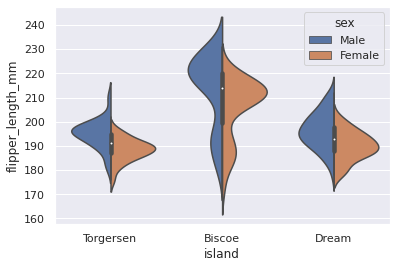

In [ ]:
#paired violin plot
sns.violinplot(x="island",y="flipper_length_mm",hue="sex",split=True ,data=p)

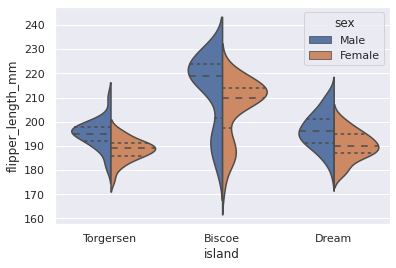

In [ ]:
sns.violinplot(x="island",y="flipper_length_mm",hue="sex",
               split=True ,inner='quartile',data=p)
#thick dotted line=median,thin ones=iqr

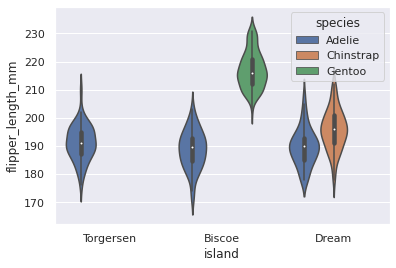

In [ ]:
sns.violinplot(x="island",y="flipper_length_mm",hue="species",data=p)

In [ ]:
p['binary_new_species']=p.loc[:,"species"].apply(lambda x: 'Gentoo' if x=='Gentoo' else 'Adelie | Chinstrap' )

In [ ]:
p

species     island  bill_length_mm  ...  body_mass_g     sex  binary_new_species
0    Adelie  Torgersen            39.1  ...       3750.0    Male  Adelie | Chinstrap
1    Adelie  Torgersen            39.5  ...       3800.0  Female  Adelie | Chinstrap
2    Adelie  Torgersen            40.3  ...       3250.0  Female  Adelie | Chinstrap
3    Adelie  Torgersen             NaN  ...          NaN     NaN  Adelie | Chinstrap
4    Adelie  Torgersen            36.7  ...       3450.0  Female  Adelie | Chinstrap
..      ...        ...             ...  ...          ...     ...                 ...
339  Gentoo     Biscoe             NaN  ...          NaN     NaN              Gentoo
340  Gentoo     Biscoe            46.8  ...       4850.0  Female              Gentoo
341  Gentoo     Biscoe            50.4  ...       5750.0    Male              Gentoo
342  Gentoo     Biscoe            45.2  ...       5200.0  Female              Gentoo
343  Gentoo     Biscoe            49.9  ...       5400.0    Male              Gentoo

[344 rows x 8 columns]

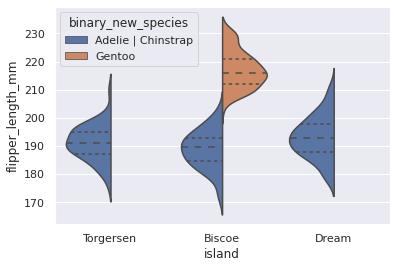

In [ ]:
sns.violinplot(x="island",y="flipper_length_mm",hue="binary_new_species",
               split=True ,inner='quartile',data=p)
#hue cannot be species as it 3 levels..if split is made true ..it is important that hue must
#have 2 levels only...In this case thats why we make them binary ....

###FACETED PLOT

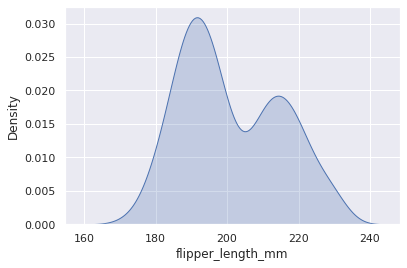

In [ ]:
sns.kdeplot(p.loc[:,"flipper_length_mm"],shade=True)

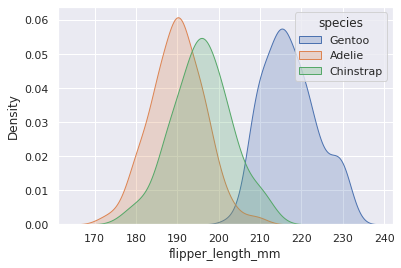

In [ ]:
sns.kdeplot(p.loc[p["species"]=="Gentoo"].loc[:,"flipper_length_mm"],shade=True)
sns.kdeplot(p.loc[p["species"]=="Adelie"].loc[:,"flipper_length_mm"],shade=True)
sns.kdeplot(p.loc[p["species"]=="Chinstrap"].loc[:,"flipper_length_mm"],shade=True)
plt.legend(title="species",labels=["Gentoo","Adelie","Chinstrap"])

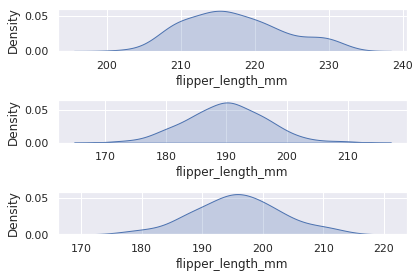

In [ ]:
fig,axs=plt.subplots(nrows=3)
sns.kdeplot(p.loc[p["species"]=="Gentoo"].loc[:,"flipper_length_mm"],shade=True,ax=axs[0])
sns.kdeplot(p.loc[p["species"]=="Adelie"].loc[:,"flipper_length_mm"],shade=True,ax=axs[1])
sns.kdeplot(p.loc[p["species"]=="Chinstrap"].loc[:,"flipper_length_mm"],shade=True,ax=axs[2])
plt.tight_layout()#for clear view

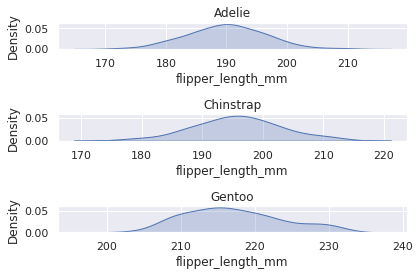

In [ ]:
column_name="species"
rows=len(p.loc[:,column_name].unique())
fig,axs=plt.subplots(nrows=rows)
i=0
for c in p.loc[:,column_name].unique():
  pl=sns.kdeplot(p.loc[p[column_name]==c].loc[:,"flipper_length_mm"],shade=True,ax=axs[i])
  i=i+1
  pl.set_title(c);
plt.tight_layout()#for clear view

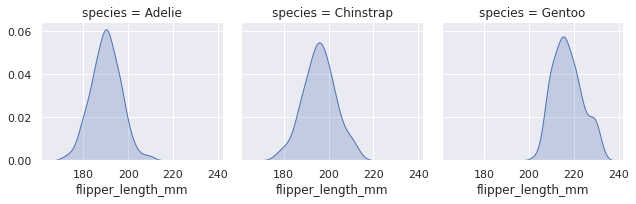

In [ ]:
g=sns.FacetGrid(p,col='species') #or g=sns.FacetGrid(p,row='species')  
g.map(sns.kdeplot,"flipper_length_mm",shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

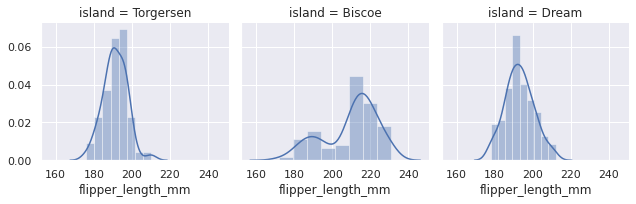

In [ ]:
g=sns.FacetGrid(p,col='island') #or g=sns.FacetGrid(p,row='species')  
g.map(sns.distplot,"flipper_length_mm")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

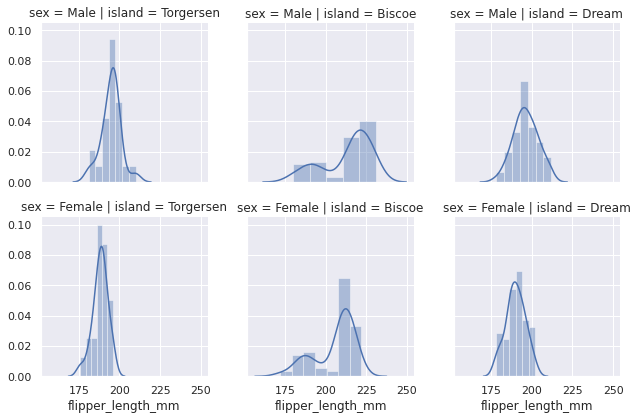

In [ ]:
g=sns.FacetGrid(p,row="sex",col='island') #or g=sns.FacetGrid(p,row='species')  
g.map(sns.distplot,"flipper_length_mm")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


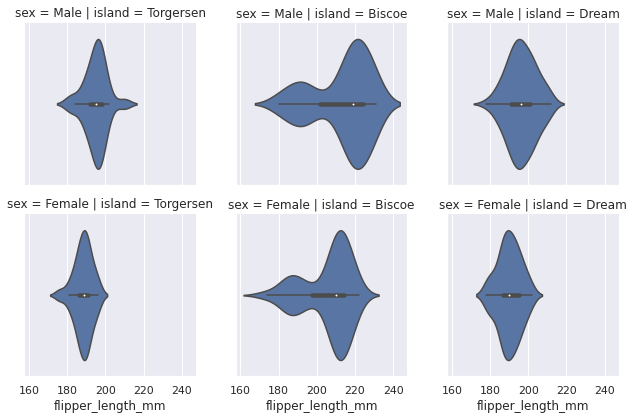

In [ ]:
g=sns.FacetGrid(p,row="sex",col='island') #or g=sns.FacetGrid(p,row='species')  
g.map(sns.violinplot,"flipper_length_mm")

###PAIR PLOT

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


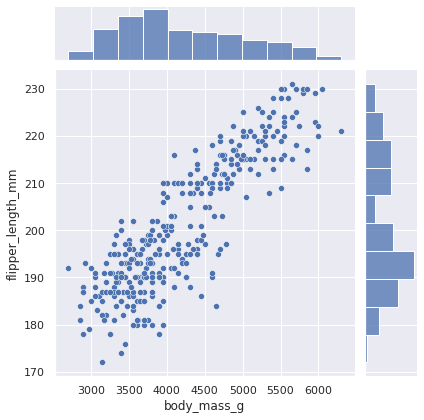

In [ ]:
sns.jointplot(p.body_mass_g,p.flipper_length_mm)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


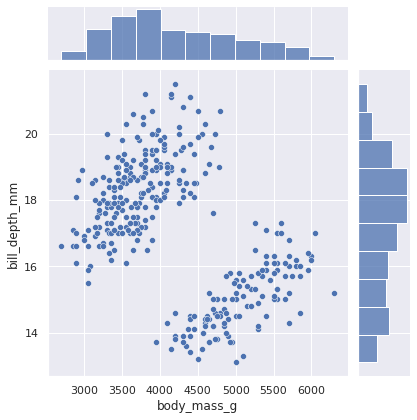

In [ ]:
sns.jointplot(p.body_mass_g,p.bill_depth_mm)

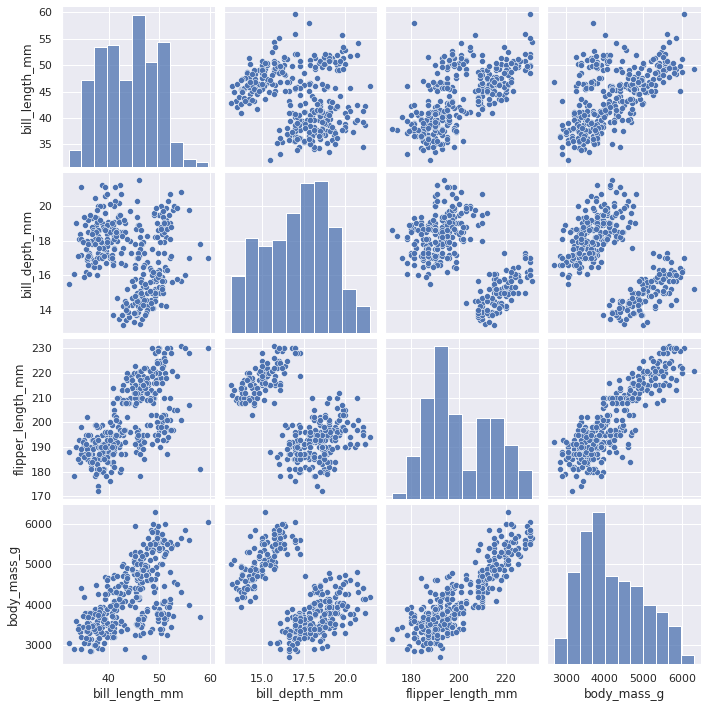

In [ ]:
sns.pairplot(p)#many combinations of jointplot

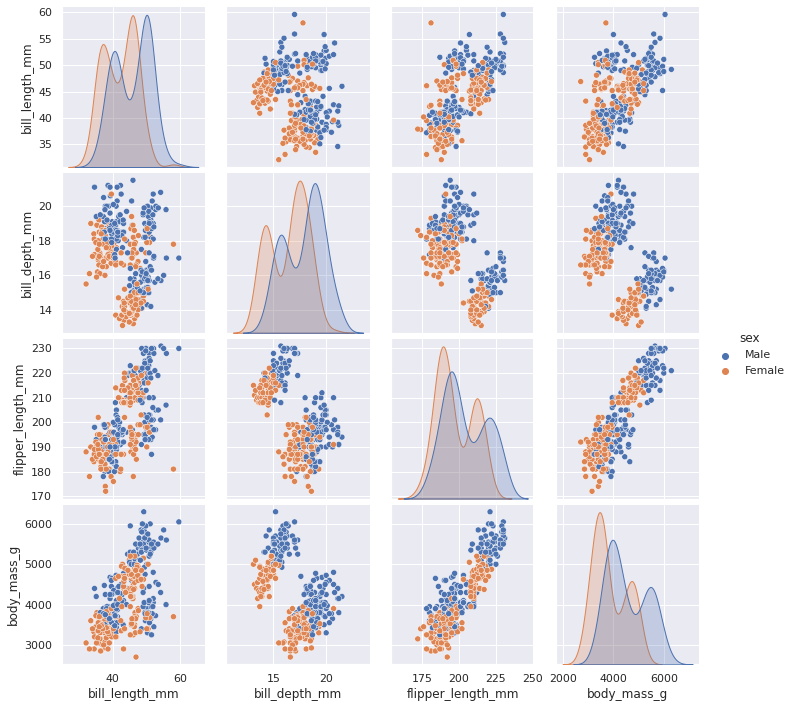

In [ ]:
sns.pairplot(p,hue="sex")

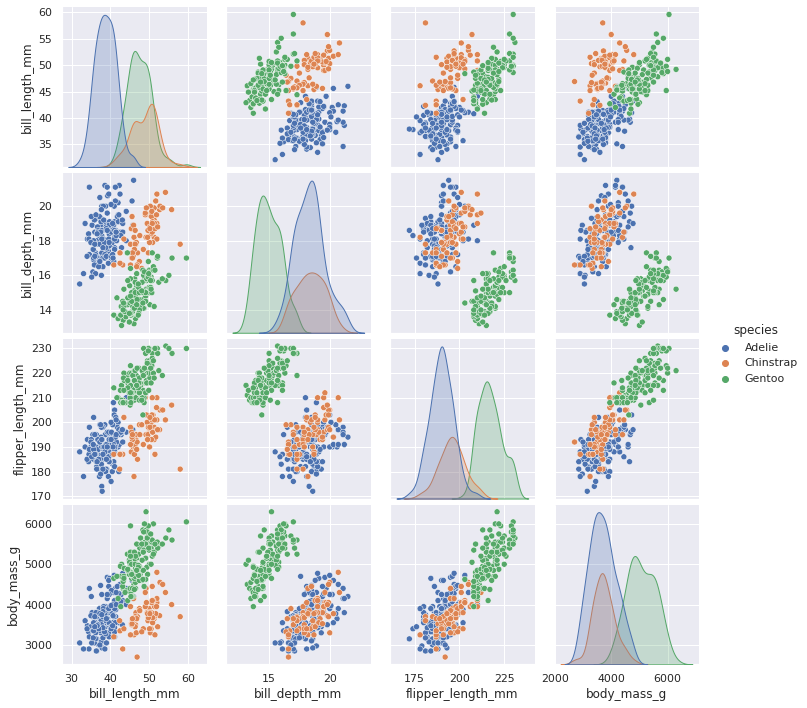

In [ ]:
sns.pairplot(p,hue="species")

In [ ]:
d=sns.load_dataset("diamonds")

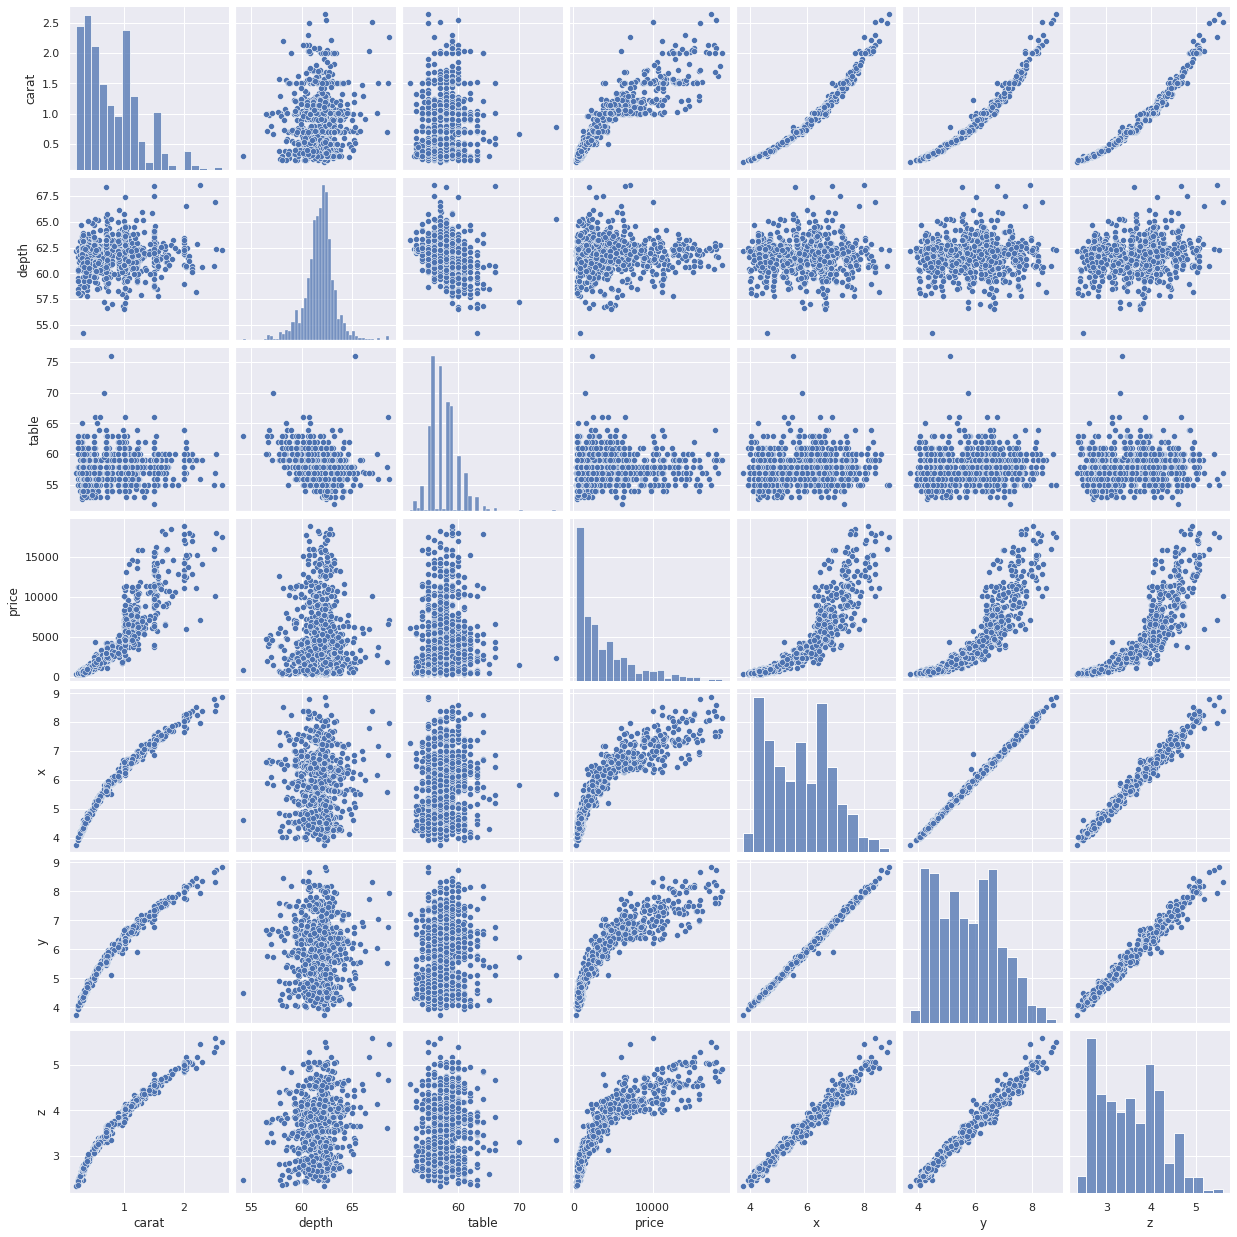

In [ ]:
sns.pairplot(d.sample(1000))

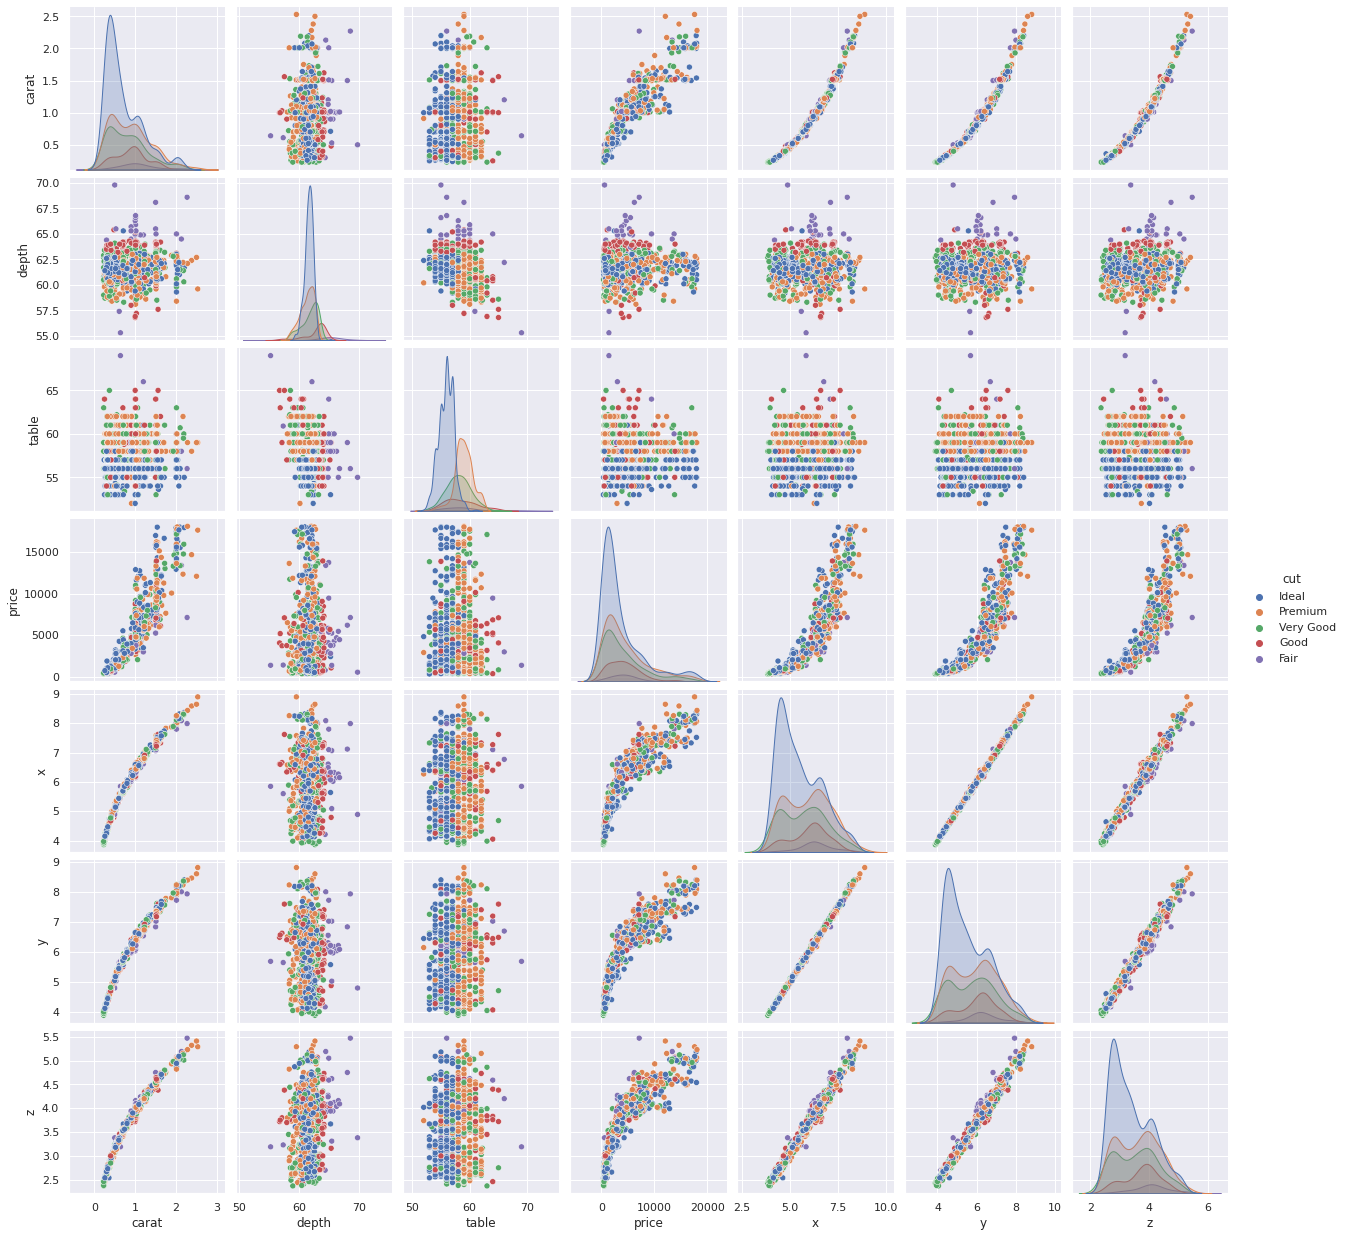

In [ ]:
sns.pairplot(d.sample(1000),hue="cut")

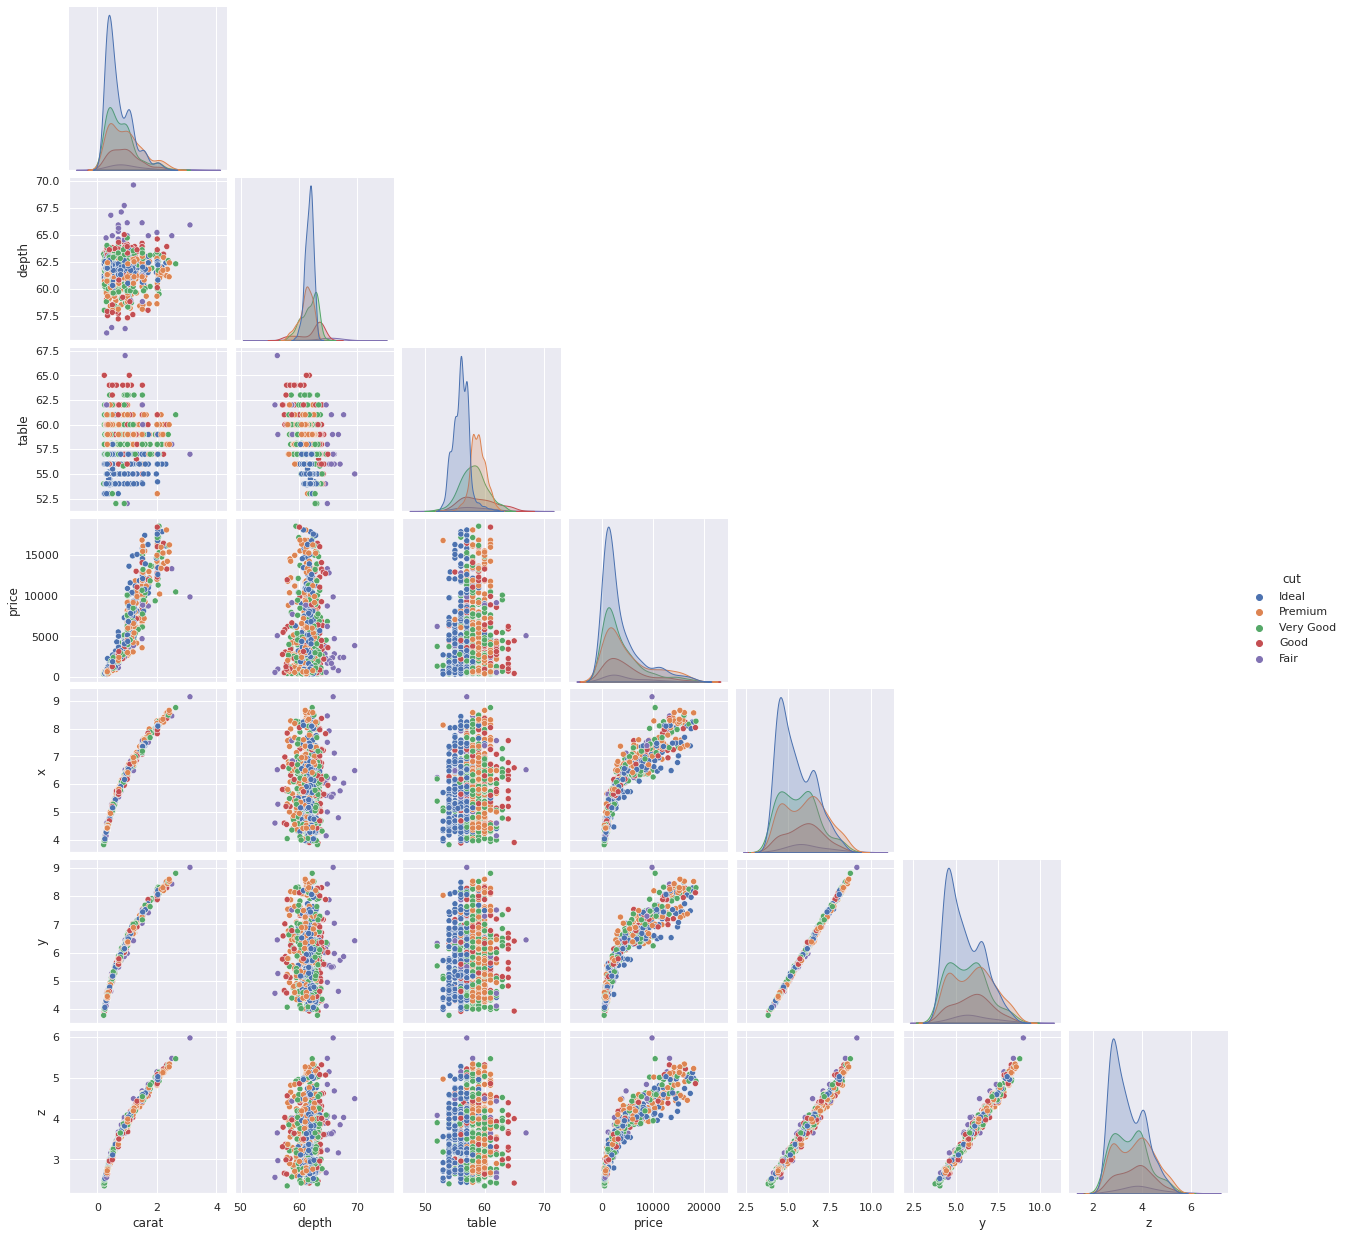

In [ ]:
sns.pairplot(d.sample(1000),hue="cut",corner=True)#x&z ==z&x redundant

#PLOTTING THE COMPOSITION OF DATA

##STATIC COMPOSITION

###PIE CHART

In [ ]:
p= sns.load_dataset("penguins")

In [ ]:
p.head(10)

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  Female
5  Adelie  Torgersen            39.3  ...              190.0       3650.0    Male
6  Adelie  Torgersen            38.9  ...              181.0       3625.0  Female
7  Adelie  Torgersen            39.2  ...              195.0       4675.0    Male
8  Adelie  Torgersen            34.1  ...              193.0       3475.0     NaN
9  Adelie  Torgersen            42.0  ...              190.0       4250.0     NaN

[10 rows x 7 columns]

In [ ]:
c=p.groupby("species")["species"].count()

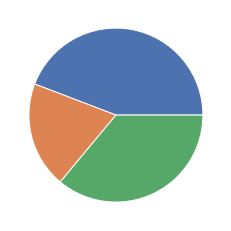

In [ ]:
plt.pie(c)
plt.show()

In [ ]:
plt.pie(c,labels=c.index)
plt.show()

In [ ]:
plt.pie(c,labels=c.index,autopct="%.2f%%")
plt.show()

In [ ]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,1,0])
plt.show()

In [ ]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[1,1,1])
plt.show()

In [ ]:
plt.pie(c,labels=c.index,autopct="%.2f%%",explode=[0,1,0],startangle=180,shadow=True)
plt.show()

In [ ]:
#pie charts---usage is less---difficult to get insight
plt.pie([1,2,3,4],autopct="%.2f")

###DONUT CHART

In [ ]:
plt.pie(np.random.randint(0,10,10),wedgeprops=dict(width=1))
plt.show()

In [ ]:
plt.pie(np.random.randint(0,10,10),wedgeprops=dict(width=0.3))
plt.show()

In [ ]:
cmap=plt.get_cmap('Accent')#refer colormaps in matplotlib doc
my_colours=cmap(np.arange(10))

In [ ]:
plt.pie(np.random.randint(0,10,10),
        wedgeprops=dict(width=0.3),colors=my_colours)
plt.show()

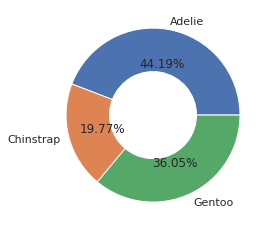

In [ ]:
plt.pie(c,labels=c.index,autopct="%.2f%%",wedgeprops=dict(width=0.5))
plt.show()

In [ ]:
c_i=p.groupby("island")["island"].count()

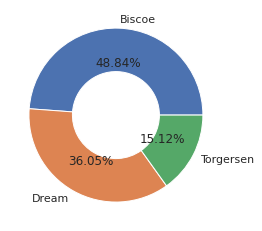

In [ ]:
plt.pie(c_i,labels=c_i.index,autopct="%.2f%%",wedgeprops=dict(width=0.5))
plt.show()

In [ ]:
co=pd.crosstab(p.species,p.island)

In [ ]:
co=co.T
co

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     124
Dream          56         68       0
Torgersen      52          0       0

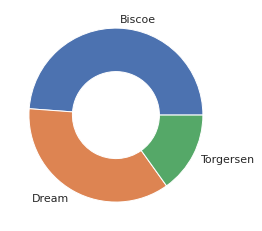

In [ ]:
plt.pie(co.sum(axis=1),labels=co.index,radius=1,wedgeprops=dict(width=0.5))
plt.show()

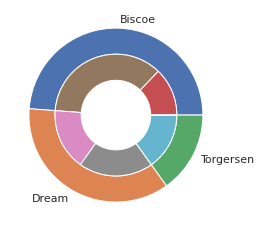

In [ ]:
plt.pie(co.sum(axis=1),labels=co.index,radius=1,wedgeprops=dict(width=0.3))
plt.pie(co.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3))
plt.show()

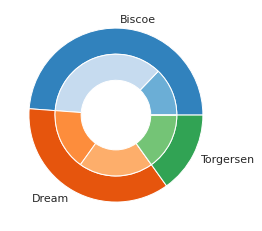

In [ ]:
cmap=plt.get_cmap('tab20c')
outer_colors=cmap(np.array([0,4,8]))
inner_colors=cmap(np.array([1,2,3,5,6,7,9,10,11]))
plt.pie(co.sum(axis=1),labels=co.index,radius=1,
        colors=outer_colors,wedgeprops=dict(width=0.3))
plt.pie(co.values.flatten(),radius=0.7,
        colors=inner_colors,wedgeprops=dict(width=0.3))
plt.show()

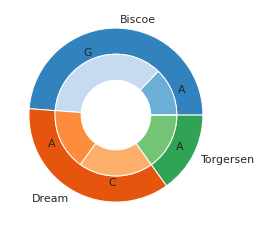

In [ ]:
plt.pie(co.sum(axis=1),labels=co.index,radius=1,
        colors=outer_colors,wedgeprops=dict(width=0.3))
plt.pie(co.values.flatten(),radius=0.7,
        colors=inner_colors,labels=['A','','G','A','C','','A','',''],wedgeprops=dict(width=0.3))
plt.show()

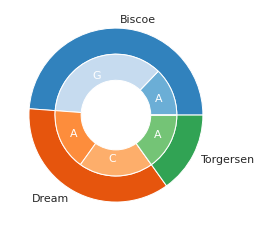

In [ ]:
plt.pie(co.sum(axis=1),labels=co.index,radius=1,
        colors=outer_colors,wedgeprops=dict(width=0.3))
plt.pie(co.values.flatten(),radius=0.7,labeldistance=0.7,
        colors=inner_colors,labels=['A','','G','A','C','','A','',''],
        wedgeprops=dict(width=0.3),textprops=dict(color='w'))
plt.show()
#label distance aligns it and textprops is to set color for it

###STACKED BAR PLOT

In [ ]:
url='https://api.covid19india.org/states_daily.json'
import urllib.request
urllib.request.urlretrieve(url,"data.json")
import json
with open("data.json") as f:
  data = json.load(f)
data = data['states_daily']
df=pd.json_normalize(data)

In [ ]:
df

In [ ]:
df.tail(3)

an    ap   ar    as    br   ch    ct  ...    tn   tr     tt un    up   ut    wb
645  16  4038  203   769  1276   74  2819  ...  4410  172  63441  0  2672  423  3720
646  21  5622  195  1263   804  113  2395  ...  5055  353  70792  0  3239  833  3179
647   0    38    1     9     5    2    46  ...    49    1    882  0    36   18    62

[3 rows x 41 columns]

In [ ]:
df_=df.tail(3)
df_.drop('date',axis=1,inplace=True)
df_.set_index('status',inplace=True)
print(df_)
df_=df_.T
df_=df_.apply(pd.to_numeric)
df_.drop('tt',inplace=True)
df_.head()

           an    ap   ar    as    br   ch  ...   tr     tt un    up   ut    wb
status                                     ...                                
Confirmed  16  4038  203   769  1276   74  ...  172  63441  0  2672  423  3720
Recovered  21  5622  195  1263   804  113  ...  353  70792  0  3239  833  3179
Deceased    0    38    1     9     5    2  ...    1    882  0    36   18    62

[3 rows x 39 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


status  Confirmed  Recovered  Deceased
an             16         21         0
ap           4038       5622        38
ar            203        195         1
as            769       1263         9
br           1276        804         5

<BarContainer object of 38 artists>

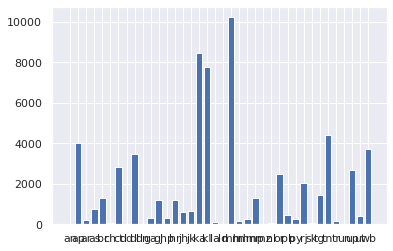

In [ ]:
plt.bar(df_.index,df_.loc[:,"Confirmed"])


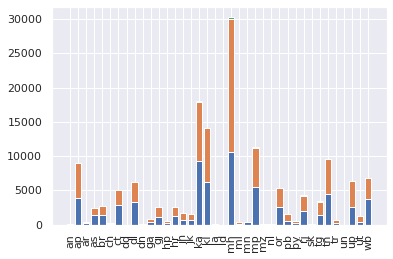

In [ ]:
#STACKING BAR PLOTS
plt.bar(df_.index,df_.loc[:,"Confirmed"])
plt.bar(df_.index,df_.loc[:,"Recovered"],bottom=df_.loc[:,"Confirmed"])
plt.bar(df_.index,df_.loc[:,"Deceased"],bottom=df_.loc[:,"Confirmed"]+df_.loc[:,"Recovered"])
plt.xticks(rotation=90);

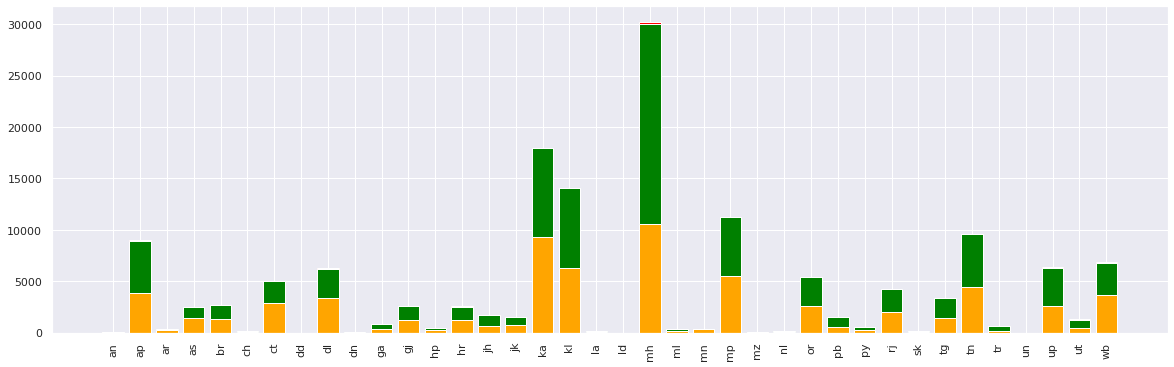

In [ ]:
fig=plt.gcf();#or plt.subplots
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.loc[:,"Confirmed"],color="Orange")
plt.bar(df_.index,df_.loc[:,"Recovered"],bottom=df_.loc[:,"Confirmed"],color="Green")
plt.bar(df_.index,df_.loc[:,"Deceased"],bottom=df_.loc[:,"Confirmed"]+df_.loc[:,"Recovered"],color="Red")
plt.xticks(rotation=90);

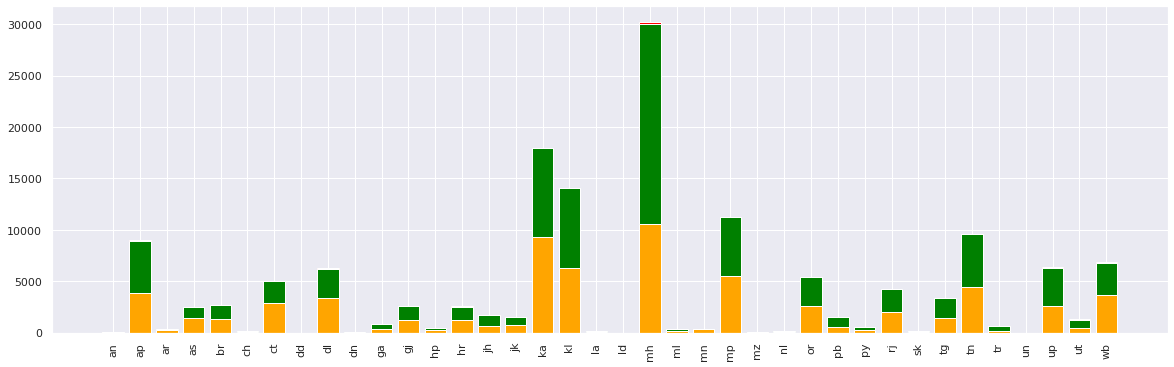

In [ ]:
fig=plt.gcf();#or plt.subplots
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.loc[:,"Confirmed"],color="Orange")
plt.bar(df_.index,df_.loc[:,"Recovered"],bottom=df_.loc[:,"Confirmed"],color="Green")
plt.bar(df_.index,df_.loc[:,"Deceased"],bottom=df_.loc[:,"Confirmed"]+df_.loc[:,"Recovered"],color="Red")
plt.xticks(rotation=90);



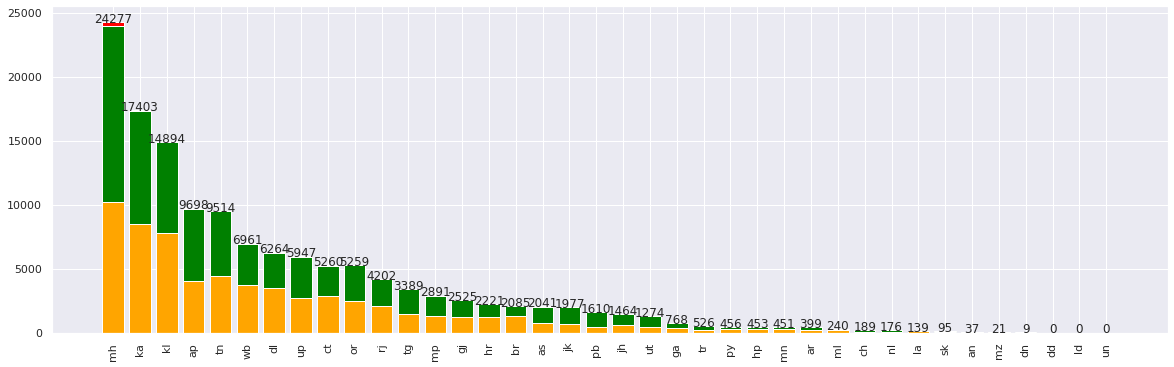

In [ ]:
fig=plt.gcf();#or plt.subplots
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.loc[:,"Confirmed"],color="Orange")
plt.bar(df_.index,df_.loc[:,"Recovered"],bottom=df_.loc[:,"Confirmed"],color="Green")
plt.bar(df_.index,df_.loc[:,"Deceased"],bottom=df_.loc[:,"Confirmed"]+df_.loc[:,"Recovered"],color="Red")
plt.xticks(rotation=90);
for i,val in enumerate(df_.index):
  y=df_.loc[val].sum()
  x=i
  plt.text(x,y,str(y),ha="center");

###RELATIVE STACKED BAR PLOT



In [ ]:
df_.head()

status  Confirmed  Recovered  Deceased
an             16         21         0
ap           4038       5622        38
ar            203        195         1
as            769       1263         9
br           1276        804         5

In [ ]:
df_["total"]=0
df_["total"]=df_.sum(axis=1)

In [ ]:
df_.head()

status  Confirmed  Recovered  Deceased  total
an             16         21         0     37
ap           4038       5622        38   9698
ar            203        195         1    399
as            769       1263         9   2041
br           1276        804         5   2085

In [ ]:
df_['Confirmed_frac']=df_.loc[:,"Confirmed"]/df_.loc[:,"total"]
df_['Recovered_frac']=df_.loc[:,"Recovered"]/df_.loc[:,"total"]
df_['Deceased_frac']=df_.loc[:,"Deceased"]/df_.loc[:,"total"]

In [ ]:
df_.head()

status  Confirmed  Recovered  ...  Recovered_frac  Deceased_frac
an             16         21  ...        0.567568       0.000000
ap           4038       5622  ...        0.579707       0.003918
ar            203        195  ...        0.488722       0.002506
as            769       1263  ...        0.618814       0.004410
br           1276        804  ...        0.385612       0.002398

[5 rows x 7 columns]

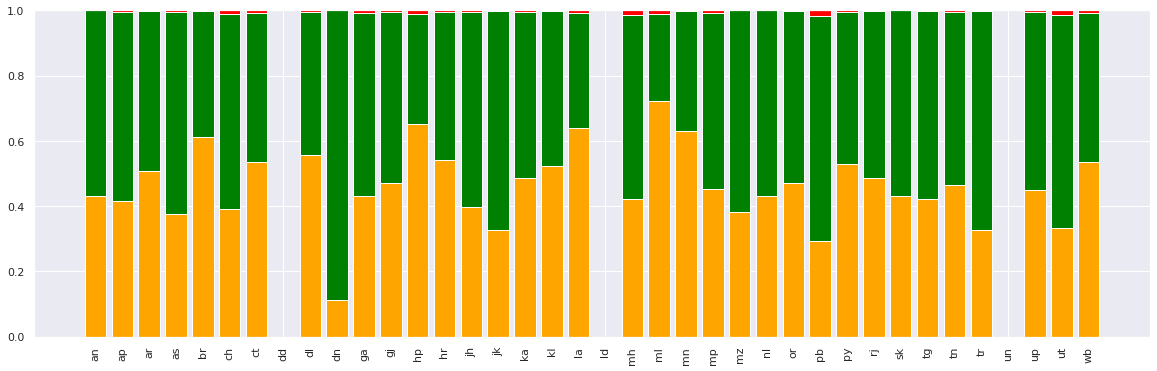

In [ ]:
fig=plt.gcf();#or plt.subplots
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.loc[:,"Confirmed_frac"],color="Orange")
plt.bar(df_.index,df_.loc[:,"Recovered_frac"],bottom=df_.loc[:,"Confirmed_frac"],color="Green")
plt.bar(df_.index,df_.loc[:,"Deceased_frac"],bottom=df_.loc[:,"Confirmed_frac"]+df_.loc[:,"Recovered_frac"],color="Red")
plt.xticks(rotation=90);


In [ ]:
df_=df_.sort_values("Confirmed_frac",ascending=False)

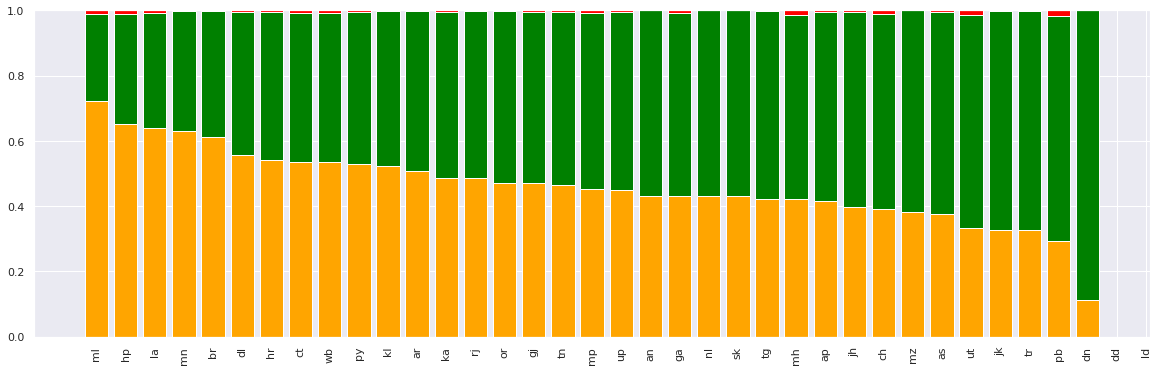

In [ ]:
fig=plt.gcf();#or plt.subplots
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.loc[:,"Confirmed_frac"],color="Orange")
plt.bar(df_.index,df_.loc[:,"Recovered_frac"],bottom=df_.loc[:,"Confirmed_frac"],color="Green")
plt.bar(df_.index,df_.loc[:,"Deceased_frac"],bottom=df_.loc[:,"Confirmed_frac"]+df_.loc[:,"Recovered_frac"],color="Red")
plt.xticks(rotation=90);

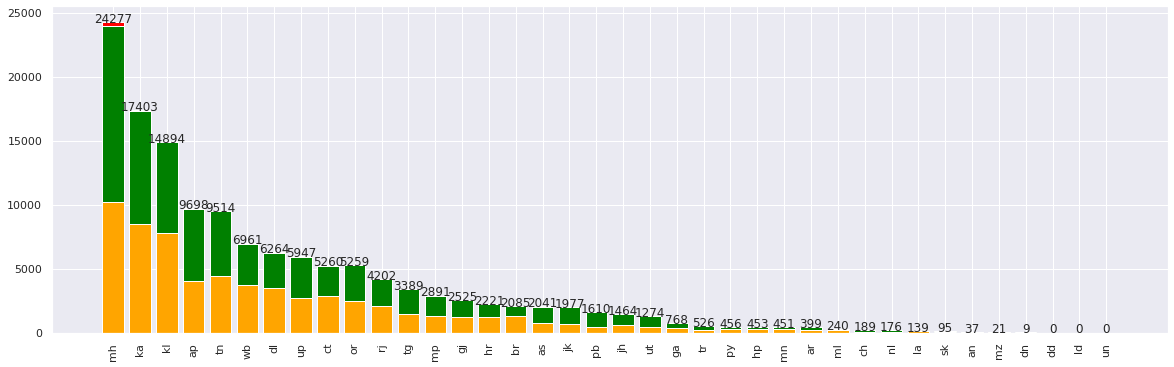

In [ ]:
df_=df_.sort_values("total",ascending=False)
fig=plt.gcf();#or plt.subplots
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.loc[:,"Confirmed"],color="Orange")
plt.bar(df_.index,df_.loc[:,"Recovered"],bottom=df_.loc[:,"Confirmed"],color="Green")
plt.bar(df_.index,df_.loc[:,"Deceased"],bottom=df_.loc[:,"Confirmed"]+df_.loc[:,"Recovered"],color="Red")
plt.xticks(rotation=90);
for i,val in enumerate(df_.index):
  y=df_.loc[val,"total"]
  x=i
  plt.text(x,y,str(y),ha="center");

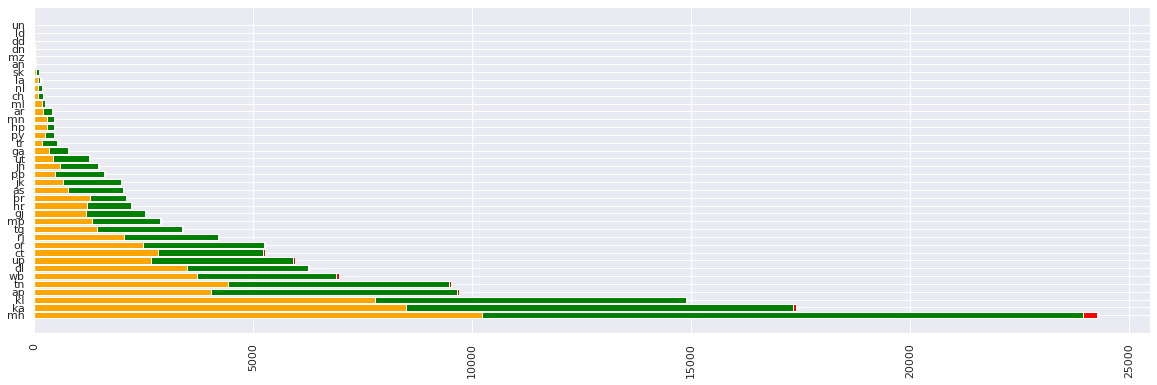

In [ ]:
df_=df_.sort_values("total",ascending=False)
fig=plt.gcf();#or plt.subplots
fig.set_size_inches(20,6)
plt.barh(df_.index,df_.loc[:,"Confirmed"],color="Orange")
plt.barh(df_.index,df_.loc[:,"Recovered"],left=df_.loc[:,"Confirmed"],color="Green")
plt.barh(df_.index,df_.loc[:,"Deceased"],left=df_.loc[:,"Confirmed"]+df_.loc[:,"Recovered"],color="Red")
plt.xticks(rotation=90);


##Time-Varying composition of data

###Stacked area plots

In [ ]:
df.head()

In [ ]:
df_=df[['mh','date','status']]

In [ ]:
df_.head()

In [ ]:
df_['date']=pd.to_datetime(df_['date'])
df_['mh']=pd.to_numeric(df_['mh'])

In [ ]:
df_

In [ ]:
#pivotting-reshaping here
df_=df_.pivot_table(values="mh",columns="status",index="date")

In [ ]:
df_.head()

In [ ]:
df_.plot.area()

In [ ]:
plt.stackplot(df_.index,df_.Confirmed,df_.Recovered,df_.Deceased)

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.stackplot(df_.index,df_.Confirmed,df_.Recovered,df_.Deceased,
              labels=["confirmed","recovered","deceased"],
              colors=["orange","green","red"])
plt.legend()

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.stackplot(df_.index,df_.Confirmed/df_.sum(axis=1),
              df_.Recovered/df_.sum(axis=1),
              df_.Deceased/df_.sum(axis=1),
              labels=["confirmed","recovered","deceased"],
              colors=["orange","green","red"])
plt.legend()

In [ ]:
def plot_stacked_area_by_state(state):
  df_=df[[state,'date','status']]
  df_['date']=pd.to_datetime(df_['date'])
  df_[state]=pd.to_numeric(df_[state])
  df_=df_.pivot_table(values=state,columns="status",index="date")  
  fig=plt.gcf()
  fig.set_size_inches(15,6)
  plt.stackplot(df_.index,df_.Confirmed/df_.sum(axis=1),
              df_.Recovered/df_.sum(axis=1),
              df_.Deceased/df_.sum(axis=1),
              labels=["confirmed","recovered","deceased"],
              colors=["orange","green","red"])
  plt.legend()

In [ ]:
plot_stacked_area_by_state('tn')

In [ ]:
plot_stacked_area_by_state('dl')

#PLOTTING RELATIONSHIPS


##SCATTER PLOT

In [ ]:
t=sns.load_dataset('tips')

In [ ]:
t.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

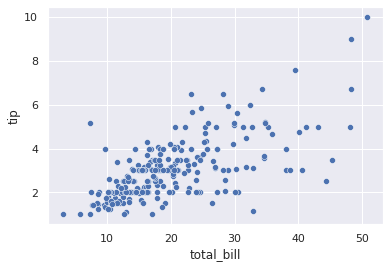

In [ ]:
sns.scatterplot(x='total_bill',y="tip",data=t)

In [ ]:
t["tip_frac"]=t['tip']/t['total_bill']

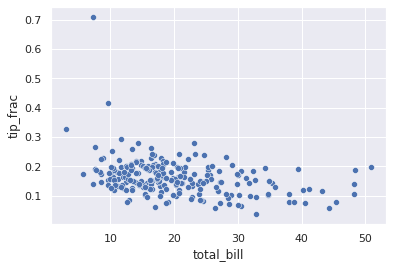

In [ ]:
sns.scatterplot(x='total_bill',y='tip_frac',data=t)

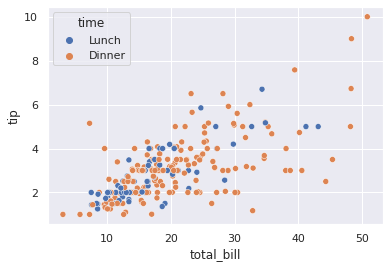

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='time')

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='sex')

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='day')

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='size')

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='size',style='sex')

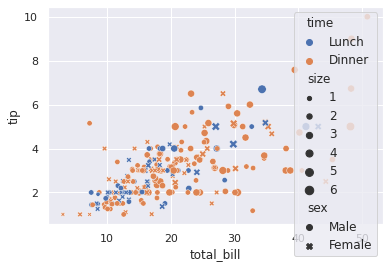

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='time',style='sex',size='size')

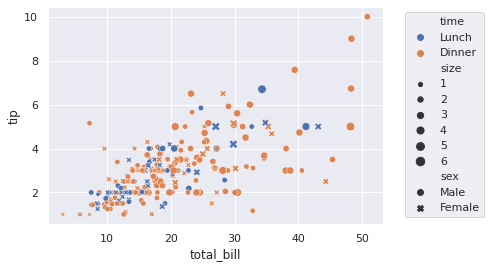

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=t,hue='time',style='sex',size='size')
plt.legend(bbox_to_anchor=(1.05,1))

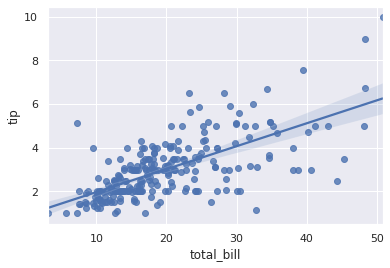

In [ ]:
sns.regplot(x='total_bill',y='tip',data=t)

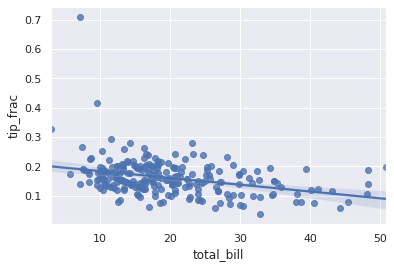

In [ ]:
sns.regplot(x='total_bill',y='tip_frac',data=t)

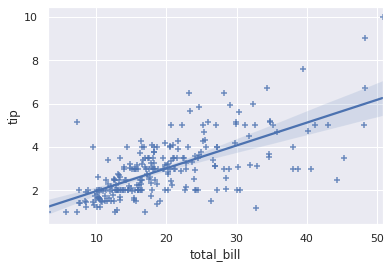

In [ ]:
sns.regplot(x='total_bill',y='tip',data=t,marker='+')

In [ ]:
d=sns.load_dataset('diamonds')

In [ ]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


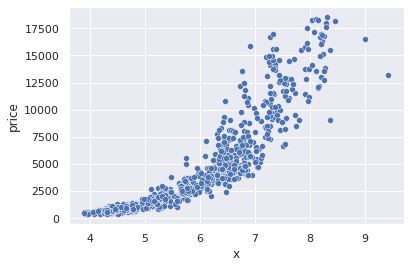

In [ ]:
sns.scatterplot('x','price',data=d.sample(1000))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


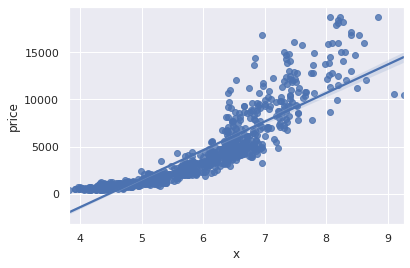

In [ ]:
sns.regplot('x','price',data=d.sample(1000))

In [ ]:
sns.regplot('x','price',data=d.sample(1000),order=2)#now points fit...

##BAR PLOT

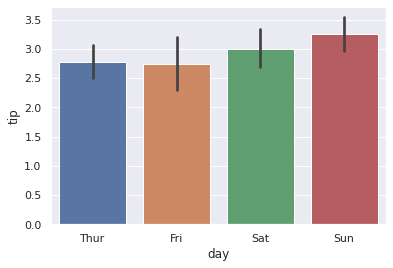

In [ ]:
#for categorical variable bar plot would be good
sns.barplot(x='day',y='tip',data=t)
#"split"based on day..apply mean function....aggregate them
#line denotes confidence--(error)

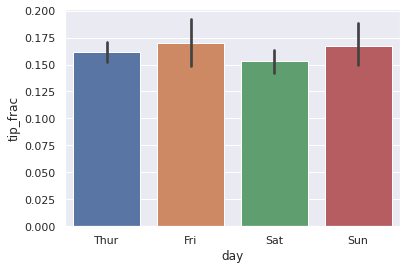

In [ ]:
sns.barplot(x='day',y='tip_frac',data=t)

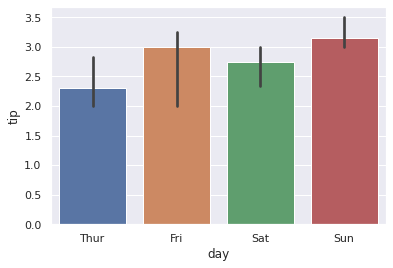

In [ ]:
sns.barplot(x='day',y='tip',data=t,estimator=np.median)

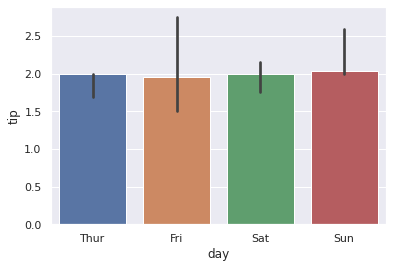

In [ ]:
def my_estimate(v):
   return np.quantile(v,0.25)
sns.barplot(x='day',y='tip',data=t,estimator=my_estimate)

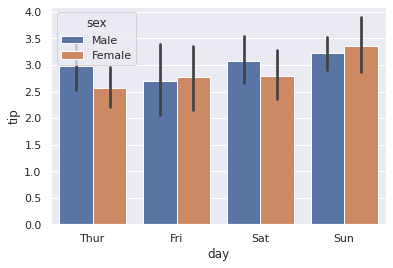

In [ ]:
sns.barplot(x='day',y='tip',data=t,hue='sex')

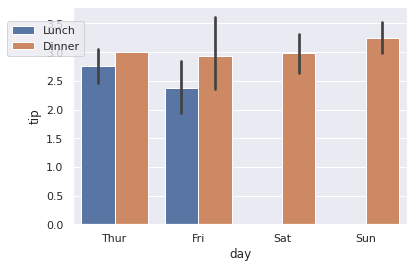

In [ ]:
sns.barplot(x='day',y='tip',data=t,hue='time')
plt.legend(bbox_to_anchor=(0.05,0.75))

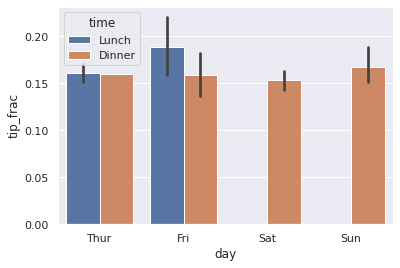

In [ ]:
sns.barplot(x='day',y='tip_frac',data=t,hue='time')

In [ ]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
#now we can easily understand the trend in bar plot for continuos variables too...lets see

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


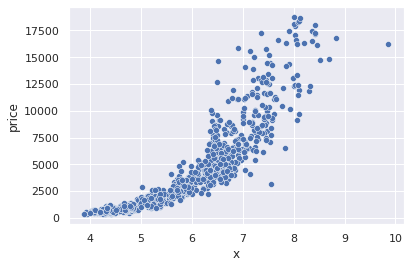

In [ ]:
sns.scatterplot('x','price',data=d.sample(1000))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


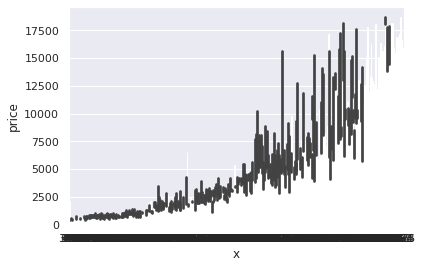

In [ ]:
sns.barplot('x','price',data=d.sample(1000))

In [ ]:
d['x_q']=pd.cut(d.loc[:,'x'],bins=15)

In [ ]:
d.head()

carat      cut color clarity  depth  ...  price     x     y     z             x_q
0   0.23    Ideal     E     SI2   61.5  ...    326  3.95  3.98  2.43   (3.58, 4.296]
1   0.21  Premium     E     SI1   59.8  ...    326  3.89  3.84  2.31   (3.58, 4.296]
2   0.23     Good     E     VS1   56.9  ...    327  4.05  4.07  2.31   (3.58, 4.296]
3   0.29  Premium     I     VS2   62.4  ...    334  4.20  4.23  2.63   (3.58, 4.296]
4   0.31     Good     J     SI2   63.3  ...    335  4.34  4.35  2.75  (4.296, 5.012]

[5 rows x 11 columns]

In [ ]:
d['x_q'].unique()

[(3.58, 4.296], (4.296, 5.012], (5.012, 5.728], (6.444, 7.16], (5.728, 6.444], ..., (-0.0107, 0.716], (7.876, 8.592], (8.592, 9.308], (9.308, 10.024], (10.024, 10.74]]
Length: 11
Categories (11, interval[float64]): [(-0.0107, 0.716] < (3.58, 4.296] < (4.296, 5.012] < (5.012, 5.728] <
                                     ... < (7.876, 8.592] < (8.592, 9.308] <
                                     (9.308, 10.024] < (10.024, 10.74]]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


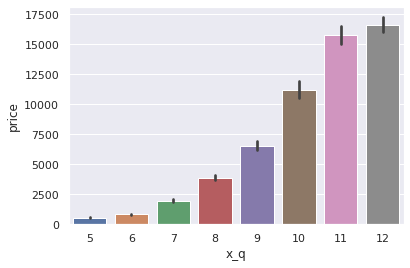

In [ ]:
sns.barplot('x_q','price',data=d.sample(1000),orient='v')

In [ ]:
d['x_q']=pd.cut(d.loc[:,'x'],bins=15,labels=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


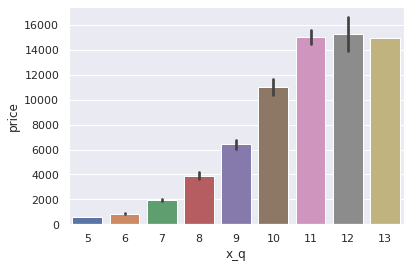

In [ ]:
sns.barplot('x_q','price',data=d.sample(1000))

##LINE PLOT

In [ ]:
f = sns.load_dataset('fmri')

In [ ]:
f.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


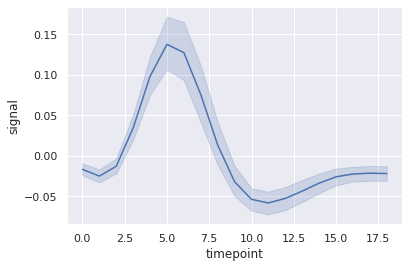

In [ ]:
sns.lineplot('timepoint','signal',data=f)
#aggregating the values----dark line---aggregte value(estimates); ---light line---error bar...

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


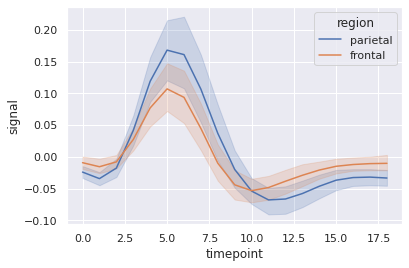

In [ ]:
sns.lineplot('timepoint','signal',data=f,hue='region')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


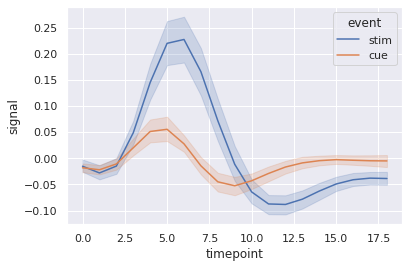

In [ ]:
sns.lineplot('timepoint','signal',data=f,hue='event')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


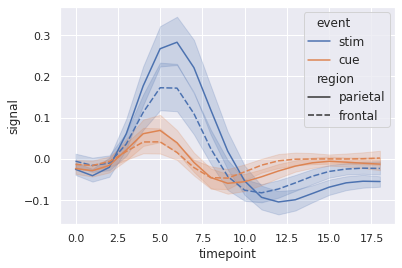

In [ ]:
sns.lineplot('timepoint','signal',data=f,hue='event',style="region")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


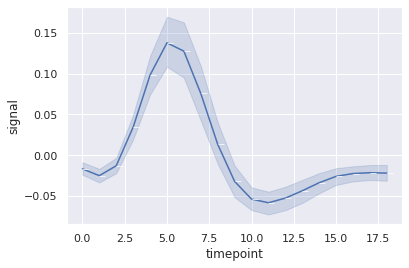

In [ ]:
sns.lineplot('timepoint','signal',data=f,marker=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


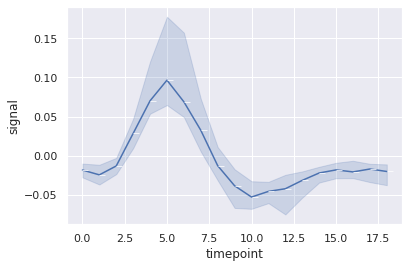

In [ ]:
sns.lineplot('timepoint','signal',data=f,marker=True,estimator=np.median)

In [ ]:
f.loc[:,"subject"].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


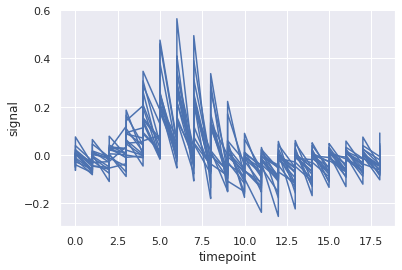

In [ ]:
sns.lineplot('timepoint','signal',data=f,units='subject',estimator=None)

In [ ]:
f_=f[(f.loc[:,"region"]=="parietal") & (f.loc[:,'event']=='cue')]

In [ ]:
f_.head()


subject  timepoint event    region    signal
532      s3          4   cue  parietal  0.058219
533      s6          5   cue  parietal  0.038145
534      s7          5   cue  parietal -0.008158
535      s8          5   cue  parietal  0.047136
536      s9          5   cue  parietal  0.055847

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


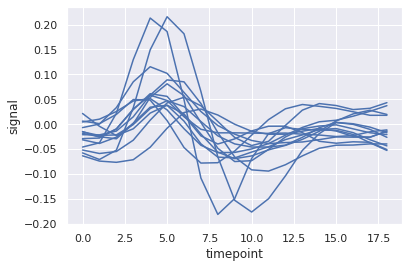

In [ ]:
sns.lineplot('timepoint','signal',data=f_,units='subject',estimator=None)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


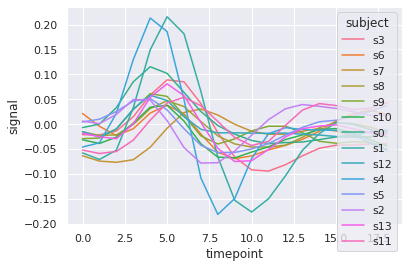

In [ ]:
sns.lineplot('timepoint','signal',data=f_,hue='subject',estimator=None)

In [ ]:
#working with numpy arrays
x=np.array([-3,-2,-1,0,1,2,3])
y=x*x

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


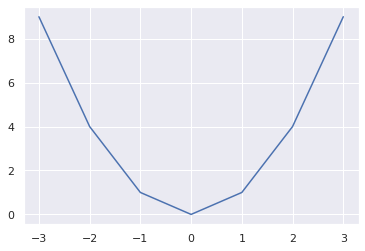

In [ ]:
sns.lineplot(x,y)

In [ ]:
url='https://api.covid19india.org/states_daily.json'
import urllib.request
urllib.request.urlretrieve(url,"data.json")
import json
with open("data.json") as f:
  data = json.load(f)
data = data['states_daily']
df=pd.json_normalize(data)
df['date']=pd.to_datetime(df['date'])
df.drop('tt',axis=1,inplace=True)
df.set_index('date',inplace=True)
df=df[df['status']=='Confirmed']
df.drop('status',axis=1,inplace=True)
df=df.apply(pd.to_numeric,errors='coerce')
df=df.rolling(7).mean()
df.reset_index(inplace=True)

In [ ]:
df.head()

date  an  ap  ar  as  br  ch  ct  ...  sk  tg  tn  tr  un  up  ut  wb
0 2020-03-14 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN
1 2020-03-15 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN
2 2020-03-16 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN
3 2020-03-17 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN
4 2020-03-18 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN

[5 rows x 40 columns]

In [ ]:
df

columns-->date | state | confirmed


In [ ]:
df_=pd.melt(df,id_vars='date',
            value_vars=list(df.columns).remove('date'),
            var_name='state',value_name='confirmed')
#reshaping the dataframe

In [ ]:
df_.tail()

date state  confirmed
8614 2020-10-16    wb     3771.0
8615 2020-10-17    wb     3865.0
8616 2020-10-18    wb     3983.0
8617 2020-10-19    wb     3992.0
8618 2020-10-20    wb     4029.0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


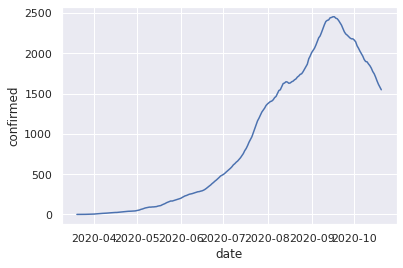

In [ ]:
sns.lineplot('date','confirmed',data=df_)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


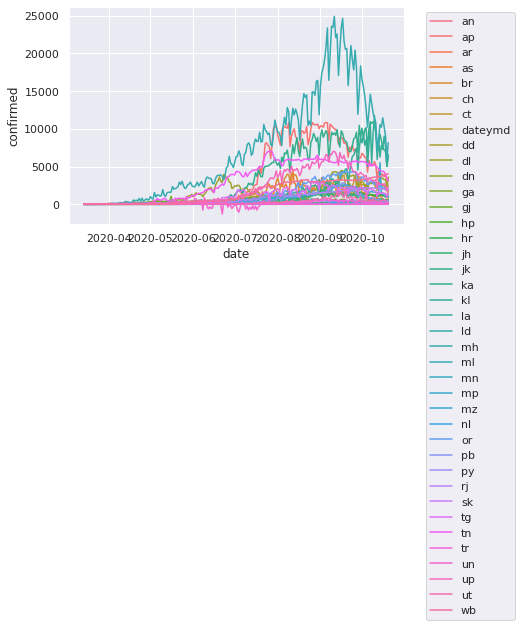

In [ ]:
sns.lineplot('date','confirmed',data=df_,hue="state")
plt.legend(bbox_to_anchor=(1.05,1))

In [ ]:
states=['mh','tn','dl','wb','ka','gj']
df_=df_[df_.loc[:,"state"].isin(states)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


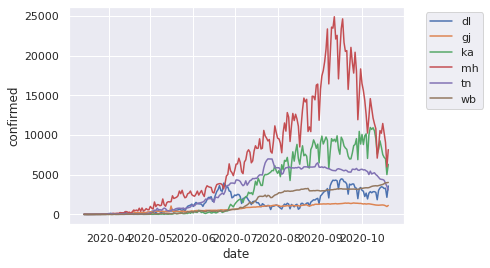

In [ ]:
sns.lineplot('date','confirmed',data=df_,hue="state")
plt.legend(bbox_to_anchor=(1.05,1))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


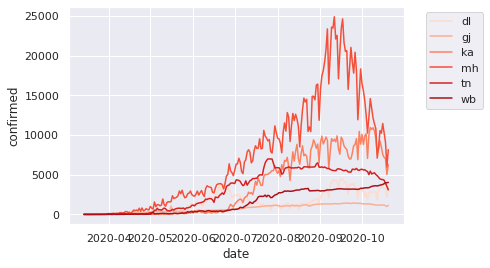

In [ ]:
sns.lineplot('date','confirmed',data=df_,hue="state",palette='Reds')
plt.legend(bbox_to_anchor=(1.05,1))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


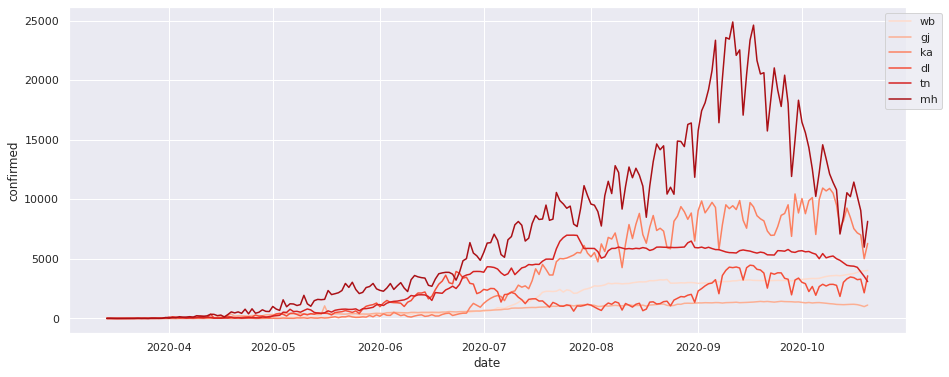

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('date','confirmed',data=df_,hue="state",palette='Reds',hue_order=['wb','gj','ka','dl','tn','mh'])
plt.legend(bbox_to_anchor=(1.05,1))

In [ ]:
df

date  an    ap   ar   as    br  ...    tn   tr  un    up   ut    wb
0   2020-03-14   0     1    0    0     0  ...     1    0   0    12    0     0
1   2020-03-15   0     0    0    0     0  ...     0    0   0     1    0     0
2   2020-03-16   0     0    0    0     0  ...     0    0   0     0    1     0
3   2020-03-17   0     0    0    0     0  ...     0    0   0     2    0     1
4   2020-03-18   0     0    0    0     0  ...     1    0   0     2    1     0
..         ...  ..   ...  ...  ...   ...  ...   ...  ...  ..   ...  ...   ...
216 2020-10-16  10  3967  198  767  1062  ...  4389  162   0  2552  549  3771
217 2020-10-17  11  3676  179  642  1173  ...  4295  134   0  2725  606  3865
218 2020-10-18  25  3986   57  318  1152  ...  3914  141   0  2486  376  3983
219 2020-10-19  18  2918  238  698   912  ...  3536   85   0  1719  336  3992
220 2020-10-20  15  3503  135  666  1837  ...  3094  135   0  2289  241  4029

[221 rows x 40 columns]

In [ ]:
df=df.rolling(7).mean()

In [ ]:
df.head(10)

In [ ]:
url='https://api.covid19india.org/states_daily.json'
import urllib.request
urllib.request.urlretrieve(url,"data.json")
import json
with open("data.json") as f:
  data = json.load(f)
data = data['states_daily']
df=pd.json_normalize(data)
df['date']=pd.to_datetime(df['date'])
df.drop('tt',axis=1,inplace=True)
df.set_index('date',inplace=True)
df=df[df['status']=='Confirmed']
df.drop('status',axis=1,inplace=True)
df=df.apply(pd.to_numeric,errors='coerce')
df=df.rolling(7).mean()#important to smoothen the plot
df.reset_index(inplace=True)
df_=pd.melt(df,id_vars='date',
            value_vars=list(df.columns).remove('date'),
            var_name='state',value_name='confirmed')
sns.lineplot('date','confirmed',data=df_)

##HEAT MAP

X[10,10] 

VALUE--(i,j)

In [ ]:
#when there is discrete(categorical)on both x and y axes
x=np.random.rand(10,10)
#form of matrix

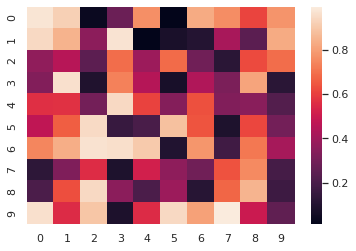

In [ ]:
sns.heatmap(x)

In [ ]:
fl=sns.load_dataset('flights')

In [ ]:
fl.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [ ]:
fl.sample(10)

year month  passengers
109  1958   Feb         318
18   1950   Jul         170
81   1955   Oct         274
137  1960   Jun         535
48   1953   Jan         196
98   1957   Mar         356
21   1950   Oct         133
51   1953   Apr         235
60   1954   Jan         204
136  1960   May         472

columns--

year| january| february| ..... december

1949| 112   ...............


In [ ]:
#(month,year)==value(passengers)
fl_=fl.pivot(index='year',columns='month',values='passengers')

In [ ]:
fl_

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405  355  306  271  306
1957   315  301  356  348  355  422  465  467  404  347  305  336
1958   340  318  362  348  363  435  491  505  404  359  310  337
1959   360  342  406  396  420  472  548  559  463  407  362  405
1960   417  391  419  461  472  535  622  606  508  461  390  432

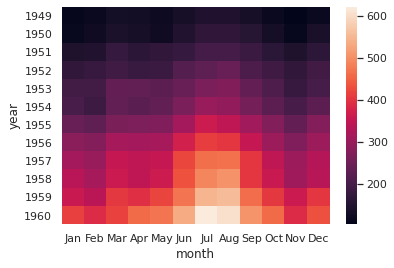

In [ ]:
sns.heatmap(fl_)

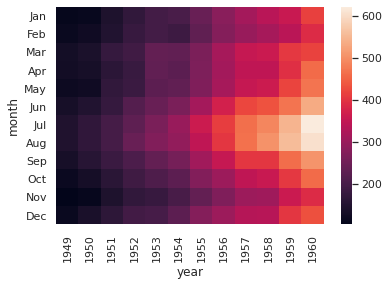

In [ ]:
sns.heatmap(fl_.T)

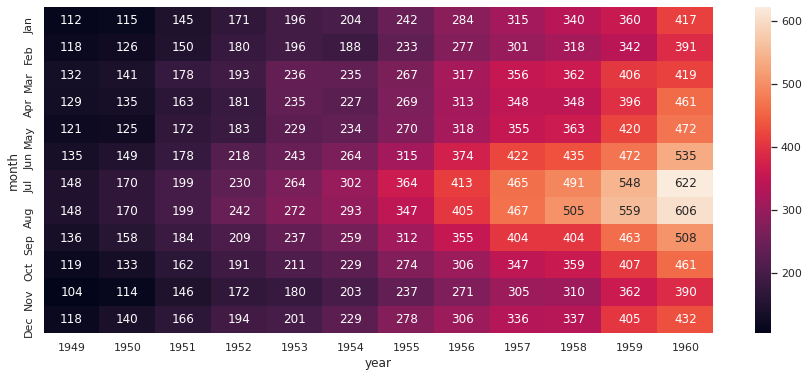

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,6)
sns.heatmap(fl_.T,annot=True,fmt="d")

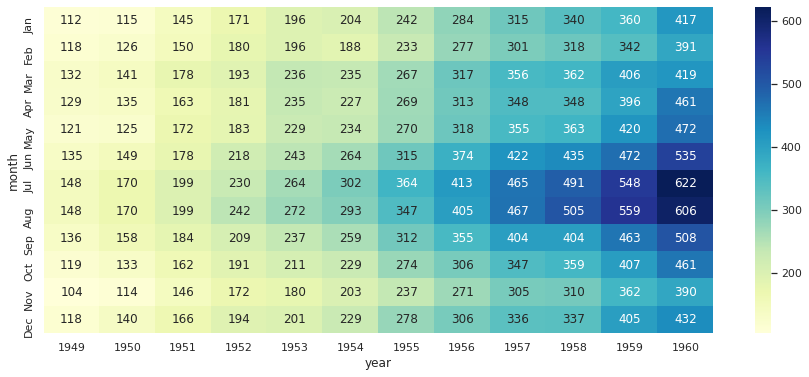

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,6)
sns.heatmap(fl_.T,annot=True,fmt="d",cmap='YlGnBu')

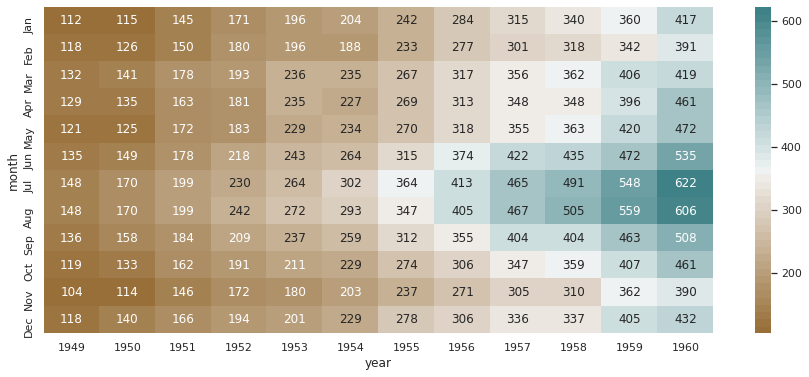

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,6)
sns.heatmap(fl_.T,annot=True,fmt="d",cmap=sns.diverging_palette(50,200,n=45))

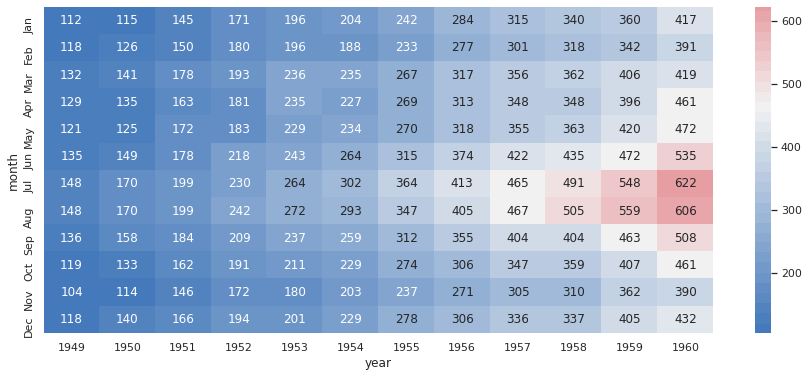

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,6)
sns.heatmap(fl_.T,annot=True,fmt="d",
            cmap=sns.diverging_palette(250,10,n=45),
            center=fl_.loc[1957,'Jul'])#reference point

#TASK

http://ml-india.org/datasets/

In [ ]:
df=pd.read_excel('ameo_2015.xlsx')

In [ ]:
df.head()

Unnamed: 0      ID   Salary  ... extraversion nueroticism openess_to_experience
0      train  203097   420000  ...       0.5269     1.35490               -0.4455
1      train  579905   500000  ...       1.2396    -0.10760                0.8637
2      train  810601   325000  ...       0.1637    -0.86820                0.6721
3      train  267447  1100000  ...      -0.3440    -0.40780               -0.9194
4      train  343523   200000  ...      -1.0697     0.09163               -0.1295

[5 rows x 39 columns]

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df.head()

ID   Salary        DOJ  ... extraversion nueroticism openess_to_experience
0  203097   420000 2012-06-01  ...       0.5269     1.35490               -0.4455
1  579905   500000 2013-09-01  ...       1.2396    -0.10760                0.8637
2  810601   325000 2014-06-01  ...       0.1637    -0.86820                0.6721
3  267447  1100000 2011-07-01  ...      -0.3440    -0.40780               -0.9194
4  343523   200000 2014-03-01  ...      -1.0697     0.09163               -0.1295

[5 rows x 38 columns]

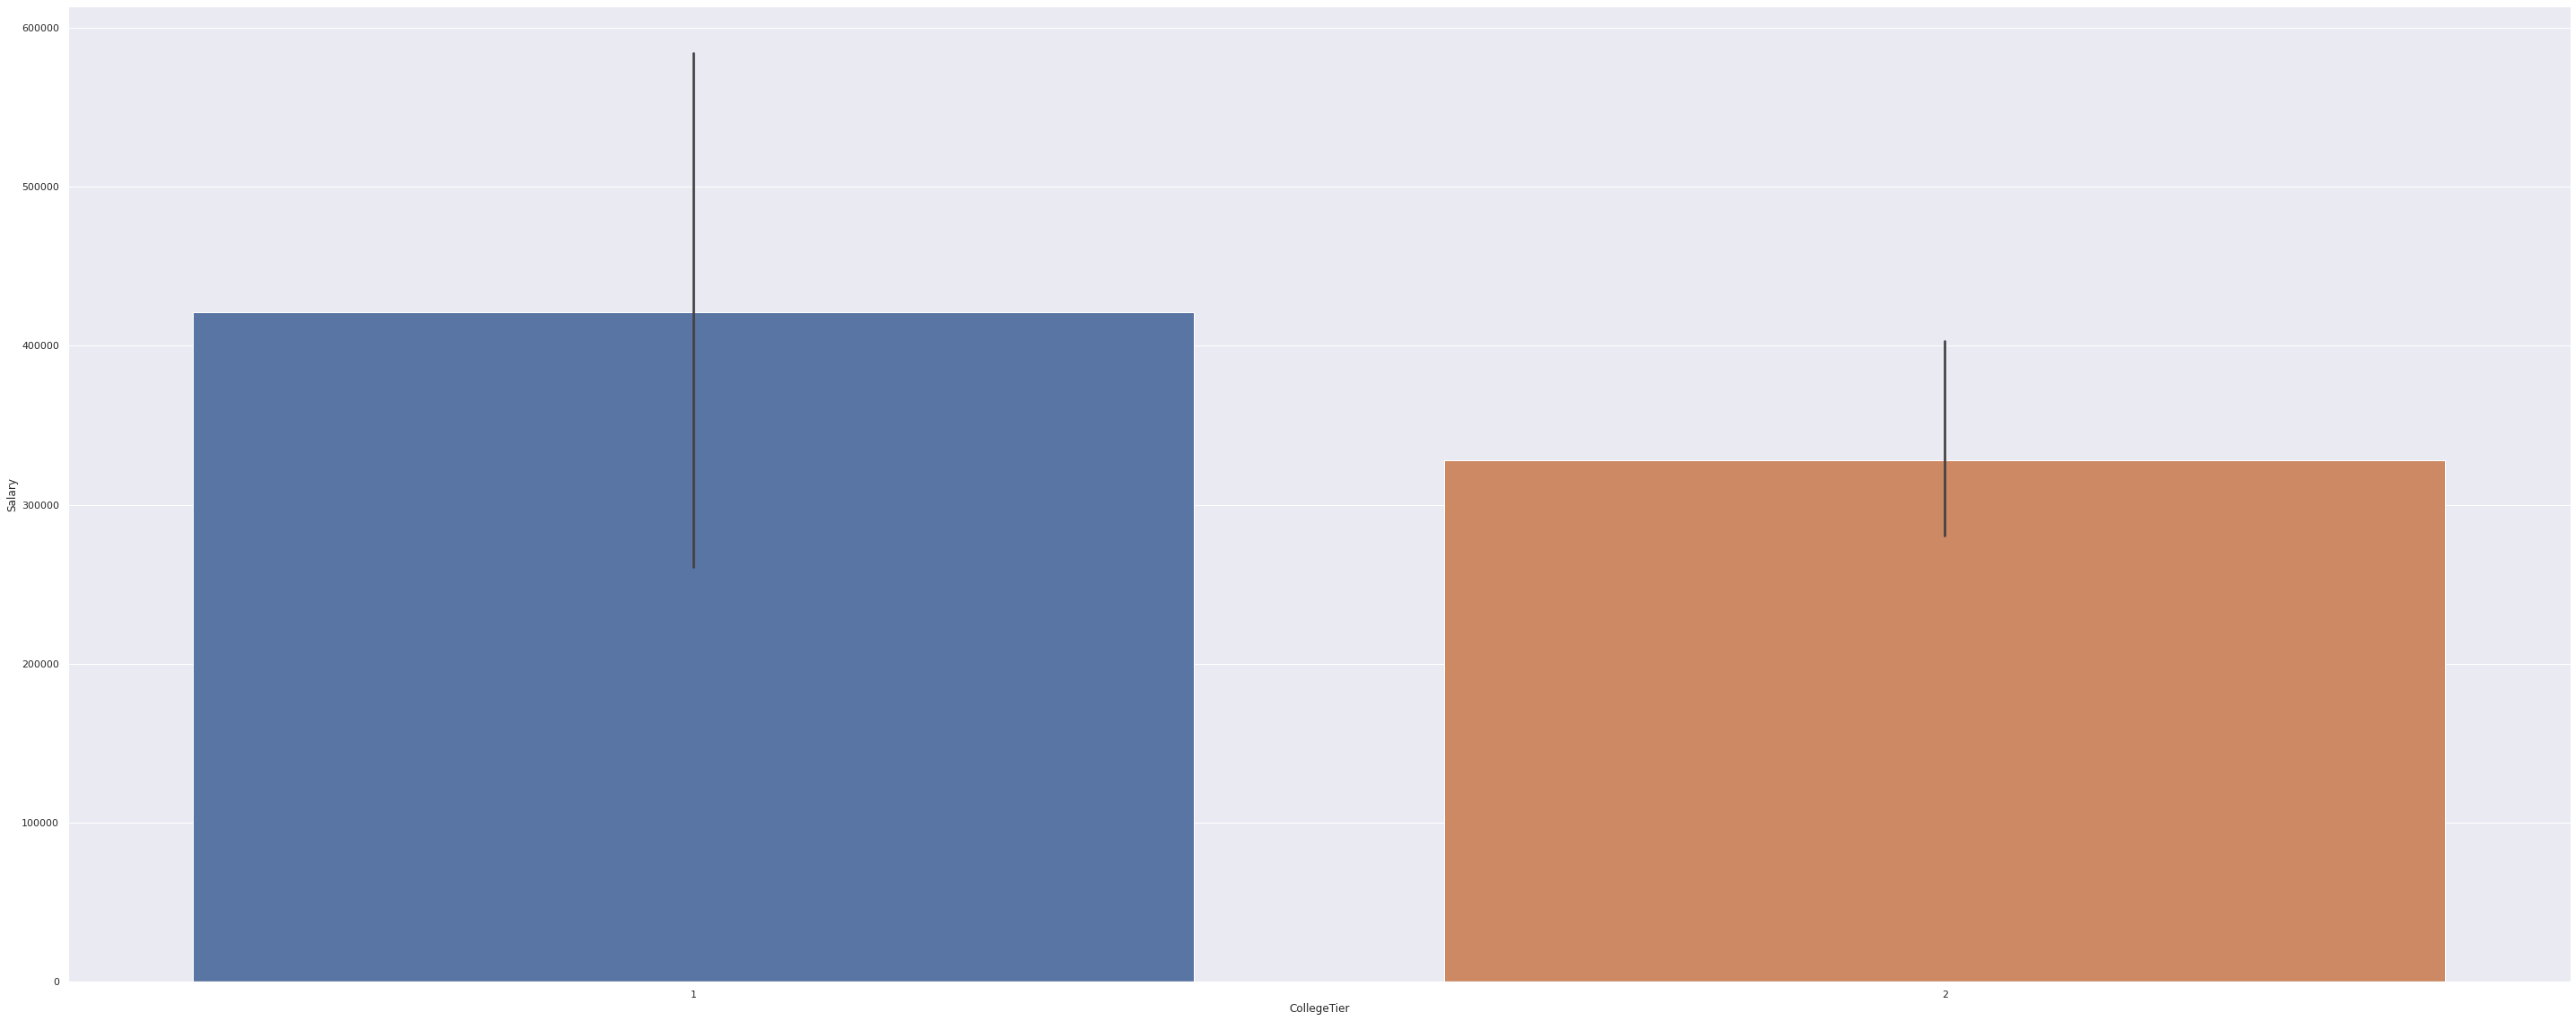

In [ ]:
fig=plt.gcf()
fig.set_size_inches(50,20)
sns.barplot(x='CollegeTier',y="Salary",data=df.sample(100))


In [ ]:
import random
import statistics
import matplotlib.pyplot as plt
def rollDice():
    roll = random.randint(1,6)
    return roll
vari=[]
nval=[10,20,30,40,50,60,70,80,90,100]
for i in range(10):
 for i in range(1000):
   average=[]
   n=10
   dices = [rollDice() for dice in range(n)] 
   average.append(sum(dices)/n)
 vari.append(statistics.variance(average))
 n=n+10
plt.scatter(nval,vari)
plt.show()


